# Terner Labs Economist/Data Analyst Technical Exercise

This is a technical exercise for a position at Terner Labs. It has two components. The first section involves testing for basic coding competency in Python and geopandas and the second section gives space to showcase my skills. The code will be heavily annotated and I will narrate/state my assumptions wherever I make any judgement calls. 

## Prepare environment, import libraries and load data
I created a virtual environment specifically for this task. You can recreate it using `pip install -r requirements.txt`. 


In [11]:
# install packages
#%pip install geopandas pandas matplotlib seaborn pygris
#%pip install "folium>=0.12" matplotlib mapclassify

In [12]:

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# settings
%matplotlib inline
pd.set_option("display.max_columns", None) # set off to see all columns



All of shapefiles can be found [here](https://data.sanjoseca.gov/organization/maps-data).

In [88]:
# load data
parcels = gpd.read_file("../data/Parcels/Parcels.shp")
zoning = gpd.read_file("../data/Zoning_Districts/Zoning_Districts.shp")
railroad = gpd.read_file("../data/Railroad/Railroad.shp")
bikeways = gpd.read_file("../data/Bikeways/Bikeways.shp")
parking = gpd.read_file("../data/Downtown_Parking_Lots/Downtown_Parking_Lots.shp")
bikeracks = gpd.read_file("../data/Bike_Racks/Bike_Racks.shp")
affordable_housing = gpd.read_file("../data/Affordable_Rental_Housing/Affordable_Rental_Housing.shp")
tract_boundaries = gpd.read_file("../data/Tract_Boundaries/Tract_Boundaries.shp")
neighborhoods = gpd.read_file("../data/Neighborhoods/Neighborhoods.shp")
transportation = gpd.read_file("../data/Multimodal_Transportation_Improvement_Plan_Areas/Multimodal_Transportation_Improvement_Plan_Areas.shp")
demographics = gpd.read_file("../data/Demographics_by_Census_Block/Demographics_by_Census_Block.shp")
equity = gpd.read_file("../data/Equity_Index_Census_Tracts/Equity_Index_Census_Tracts.shp")




/opt/anaconda3/envs/housing_project/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/opt/anaconda3/envs/housing_project/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 4274 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(


In [91]:
# view parcels
#parcels.head()  
equity.head()


OBJECTID FACILITYID     FIPSCODE                 GEOID CENSUSTRAC  \
0         1        249  06085507807  1400000US06085507807    5078.07   
1         2        179  06085505012  1400000US06085505012    5050.12   
2         3        341  06085511910  1400000US06085511910    5119.10   
3         4        348  06085511917  1400000US06085511917    5119.17   
4         5         46  06085502903  1400000US06085502903    5029.03   

                                          GEOGRAPHIC  POPTOTAL  HOUSEHOLDC  \
0  Census Tract 5078.07, Santa Clara County, Cali...      3432        1093   
1  Census Tract 5050.12, Santa Clara County, Cali...      2879        1456   
2  Census Tract 5119.10, Santa Clara County, Cali...      3051        1082   
3  Census Tract 5119.17, Santa Clara County, Cali...      4220        1575   
4  Census Tract 5029.03, Santa Clara County, Cali...      5270        1881   

   RACEHISPAN  RACEHISP_1  RACEWHITEN  RACEWHITER  RACEBLACKN  RACEBLACKR  \
0          95       0.028         546       0.159           0       0.000   
1         167       0.058         883       0.307          79       0.027   
2         162       0.053        1934       0.634           0       0.000   
3          42       0.010        1630       0.386           0       0.000   
4         885       0.168        3085       0.585           0       0.000   

   RACEASIANN  RACEASIANR  RACEOTHER  RACEOTHERR  RACEBIPOC  RACEBIPOCR  \
0        2641       0.770        150       0.044       2886       0.841   
1        1666       0.579         84       0.029       1996       0.693   
2         716       0.235        239       0.078       1117       0.366   
3        2427       0.575        121       0.029       2590       0.614   
4        1005       0.191        295       0.056       2185       0.415   

   EQUITYSCOR  INCMEDIANI  EQUITYSC_1  INCMEDIANH  INCMEDIANW  INCMEDIANB  \
0           4      250000           1         NaN    191250.0         NaN   
1           2      201190           1    173262.0    223382.0         NaN   
2           1      250000           1         NaN    250000.0         NaN   
3           2      239073           1         NaN    188438.0         NaN   
4           1      219107           1    221154.0    208864.0         NaN   

   INCMEDIANA  INCMEDIANO  EQUITYSC_2  LANGGROUPP  LEPTOTAL  LEPRATIO  \
0    250000.0         NaN           5        3272       324     0.099   
1    223512.0    173445.0           3        2691       555     0.206   
2    250000.0    250000.0           2        2994       128     0.043   
3    240658.0         NaN           3        4175       619     0.148   
4    241250.0    412829.0           2        4775       249     0.052   

   LEPSPANISH  LEPSPANI_1  LEPINDOEUR  LEPINDOE_1  LEPASIANPA  LEPASIAN_1  \
0           0       0.000          21       0.065         285       0.880   
1          24       0.043          70       0.126         451       0.813   
2          10       0.078          39       0.305          79       0.617   
3           0       0.000          75       0.121         484       0.782   
4          57       0.229          36       0.145         156       0.627   

   LEPOTHER  LEPOTHERRA  EQUITYSC_3  EDUGROUPPO  EDULESSTHA  EDULESST_1  \
0        18       0.056           1        2246           2       0.001   
1        10       0.018           3        2367          10       0.004   
2         0       0.000           1        2312          14       0.006   
3        60       0.097           2        3060          26       0.008   
4         0       0.000           1        3728          33       0.009   

   EQUITYSC_4   LASTUPDATE LASTUPDA_1           ENTERPRISE INSANJOSE  \
0           1  ACSDT5Y2022 2024-04-23  REF-CDTR-0000000249   Partial   
1           1  ACSDT5Y2022 2024-04-23  REF-CDTR-0000000179       Yes   
2           1  ACSDT5Y2022 2024-04-23  REF-CDTR-0000000341       Yes   
3           1  ACSDT5Y2022 2024-04-23  REF-CDTR-0000000348       Yes   
4          

In [92]:
import pandas as pd

# Example: your GeoDataFrame or DataFrame
df = equity  # replace with your DataFrame

# Step 1: select columns that contain "EQUITY"
equity_cols = [col for col in df.columns if "EQUITY" in col]

# Step 2: get unique values for each of these columns
unique_values = {col: df[col].unique() for col in equity_cols}

# Print the results
for col, values in unique_values.items():
    print(f"{col}: {values}\n")


EQUITYSCOR: [4 2 1 3 5]

EQUITYSC_1: [1 2 3 4 5]

EQUITYSC_2: [ 5  3  2  4  6  7  8 10  9]

EQUITYSC_3: [1 3 2 4 5]

EQUITYSC_4: [1 2 3 4 5]



In [15]:
# view zoning data 
zoning.head()

OBJECTID FACILITYID  INTID ZONING ZONINGABBR REZONINGFI PDUSE PDDENSITY  \
0         1          1      1      A          A       None  None         0   
1         2          2      2      A          A       None  None         0   
2         3          3      3      A          A       None  None         0   
3         4          4      4      A          A       None  None         0   
4         5          5      5  R-1-5      R-1-5    C20-007  None         0   

  DEVELOPEDA APPROVALDA COLORCODE LASTUPDATE NOTES    SHAPE_Leng  \
0       None       None        17 2022-04-22  None    856.089583   
1       None       None        17 2022-04-22  None  15784.038147   
2       None       None        17 2022-04-22  None   4548.408852   
3       None       None        17 2022-04-22  None  17137.289845   
4       None       None         1 2022-04-22  None   2236.203702   

     SHAPE_Area                                           geometry  
0  4.495781e+04  POLYGON ((6193968.23 1891446.99, 6193780.24 18...  
1  6.765505e+06  POLYGON ((6195588.513 1891335.018, 6196508.11 ...  
2  4.885912e+05  POLYGON ((6193048.64 1892200.24, 6193097.11 18...  
3  1.136541e+07  POLYGON ((6192765.192 1896544.75, 6193127.218 ...  
4  5.718252e+04  POLYGON ((6173652.791 1897712.091, 6173640.15 ...

## SECTION A.
### 1. How many parcels are there in each zone?

**PROMPT:** Find the San Jose Parcels in Urban Village, Mixed Use Commercial, Urban Residential, and Transit Residential zones (zoning codes here). How many Parcels are there in each of these zones?

- Join the zoning geometries to the parcel geometries to find which zone the parcel falls into
- Note that some parcels may overlap with more than one zone. We suggest you write a custom function in a separate .py file that returns only one overlapping zone per parcel
- Determine how many parcels are in each zone

**WHAT I DID:** I first visualized the shapefiles so I could better understand the problem and become more familiar with the data. I then spatially joined the parcel with the zoning shapefile but left the multiple record issue unaddressed so I could visually inspect the results. I then made sure my approach to select the parcel with the largest overlapping area was appropriate, selected the parcel with the largest overlap, counted the number of parcels by each of the 4 zoning districts, and then visualized the result. 

#### 1.1 Visual the shapefile

I first wanted to visualize the shapefiles I'd be working with and inspect the distribution of 4 zoning types pertaining to this question. 

In [16]:
# subset out only the 4 zoning types I will focus on
# --------
# Urban Village             = UV
# Mixed Use Commercial      = MUC
# Urban Residential         = UR
# Transit Residential       = TR
zoning4 = zoning.query("ZONING == 'UV'or ZONING == 'MUC' or ZONING == 'UR' or ZONING == 'TR' ")

<Axes: >

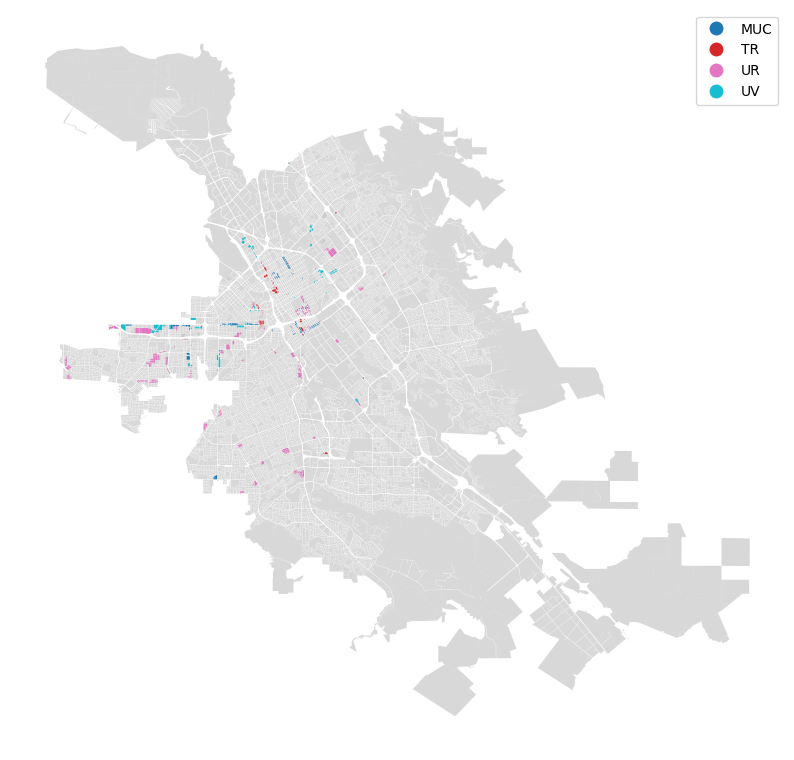

In [17]:
# overlap the zoning types on the parcel shapefile and set each zoning type as a different color
# --------
fig, ax  = plt.subplots(figsize=(10,12))
ax.axis('off')
parcels.plot(ax = ax, color = 'grey', alpha = 0.3, legend = True)
zoning4.plot(ax = ax, column = 'ZONING', legend = True)

#### 1.2 Spatial join

Join the parcel and the zoning shapefiles together to find which zone the parcel falls into. I wrote a function contained in `util.py` called `sjoin_parcels_to_zd`. While the instructions said to ensure it only returned on parcel per zoning district, I preferred to do that at a latter step to ensure the function was working correctly and I could visualize some of the overlaps and better understand the data. 

In [18]:
# execute spatial join function
from utils import sjoin_parcels_to_zd
parcels_in_zd = sjoin_parcels_to_zd(parcels, zoning, how="largest")


In [19]:
# inspect join
parcels_in_zd.head()

OBJECTID_left PARCELID  INTID_left       APN LOTNUM PARCELTYPE FEATURECLA  \
0              1      568         568  23712112      7        Tax     Parcel   
1              2      508         508  23717101      1        Tax     Parcel   
1              2      508         508  23717101      1        Tax     Parcel   
1              2      508         508  23717101      1        Tax     Parcel   
2              3      509         509  23717102      2        Tax     Parcel   

  PLANCRT PLANMOD LASTUPDATE_left NOTES_left COVERED  SHAPE_Leng_left  \
0     MGE    None      2005-10-25       None    None       694.824660   
1     MGE    None      2005-10-25       None    None      1091.096404   
1     MGE    None      2005-10-25       None    None      1091.096404   
1     MGE    None      2005-10-25       None    None      1091.096404   
2     MGE    None      2005-10-25       None    None      1308.365727   

   SHAPE_Area_left CREATIONDA  \
0     30293.181866 1900-01-01   
1     67674.864533 1900-01-01   
1     67674.864533 1900-01-01   
1     67674.864533 1900-01-01   
2    101464.923357 1900-01-01   

                                            geometry  OBJECTID_right  \
0  POLYGON ((6152190.18 1960992.53, 6152117.6 196...          7743.0   
1  POLYGON ((6149855.9 1962848.74, 6149591.14 196...           624.0   
1  POLYGON ((6149855.9 1962848.74, 6149591.14 196...           663.0   
1  POLYGON ((6149855.9 1962848.74, 6149591.14 196...          2244.0   
2  POLYGON ((6150024.95 1962661.16, 6149801.39 19...          3088.0   

  FACILITYID  INTID_right  ZONING ZONINGABBR REZONINGFI PDUSE PDDENSITY  \
0       7743       7743.0      HI         HI       None  None         0   
1        624        624.0   A(PD)      A(PD)      70072   Ind         0   
1        663        663.0   A(PD)      A(PD)      73112   Com         0   
1       2244       2244.0      CG         CG      00111  None         0   
2       3088       3088.0  IP(PD)     IP(PD)      90068   Com         0   

  DEVELOPEDA APPROVALDA COLORCODE LASTUPDATE_right NOTES_right  \
0       None       None        15       2022-04-22        None   
1        Yes       None        17       2022-04-22        None   
1        Yes       None        17       2022-04-22        None   
1       None       None         7       2022-04-22        None   
2        Yes       None        13       2022-04-22        None   

   SHAPE_Leng_right  SHAPE_Area_right  overlap_area  
0       1181.808558      62997.552672  30288.801759  
1       2704.667984     346896.334819  67657.267483  
1       1622.181189      86427.337276      0.000000  
1       1725.781095     173391.392840      0.000000  
2       1333.366841     107116.764778      0.000000

##### Visual check 1

To ensure it worked correctly, I found two example parcels that I knew were in multiple zoning districts and visualized them separately. I made to sure to keep the multiple parcel records so I could ensure the function was using my chosen method (chose the parcel with the largest overlap area) to correctly identify the parcel I wanted to keep. The overlap in the first example parcel seems to mostly to be boundaries overlapping, rather than much of the polygons. 

In [20]:
# In this case, the parcel boundaries overlap with three zoning districts but only one has much coverage.
parcels_in_zd[parcels_in_zd["PARCELID"] == "508"]

OBJECTID_left PARCELID  INTID_left       APN LOTNUM PARCELTYPE FEATURECLA  \
1              2      508         508  23717101      1        Tax     Parcel   
1              2      508         508  23717101      1        Tax     Parcel   
1              2      508         508  23717101      1        Tax     Parcel   

  PLANCRT PLANMOD LASTUPDATE_left NOTES_left COVERED  SHAPE_Leng_left  \
1     MGE    None      2005-10-25       None    None      1091.096404   
1     MGE    None      2005-10-25       None    None      1091.096404   
1     MGE    None      2005-10-25       None    None      1091.096404   

   SHAPE_Area_left CREATIONDA  \
1     67674.864533 1900-01-01   
1     67674.864533 1900-01-01   
1     67674.864533 1900-01-01   

                                            geometry  OBJECTID_right  \
1  POLYGON ((6149855.9 1962848.74, 6149591.14 196...           624.0   
1  POLYGON ((6149855.9 1962848.74, 6149591.14 196...           663.0   
1  POLYGON ((6149855.9 1962848.74, 6149591.14 196...          2244.0   

  FACILITYID  INTID_right ZONING ZONINGABBR REZONINGFI PDUSE PDDENSITY  \
1        624        624.0  A(PD)      A(PD)      70072   Ind         0   
1        663        663.0  A(PD)      A(PD)      73112   Com         0   
1       2244       2244.0     CG         CG      00111  None         0   

  DEVELOPEDA APPROVALDA COLORCODE LASTUPDATE_right NOTES_right  \
1        Yes       None        17       2022-04-22        None   
1        Yes       None        17       2022-04-22        None   
1       None       None         7       2022-04-22        None   

   SHAPE_Leng_right  SHAPE_Area_right  overlap_area  
1       2704.667984     346896.334819  67657.267483  
1       1622.181189      86427.337276      0.000000  
1       1725.781095     173391.392840      0.000000

<Axes: >

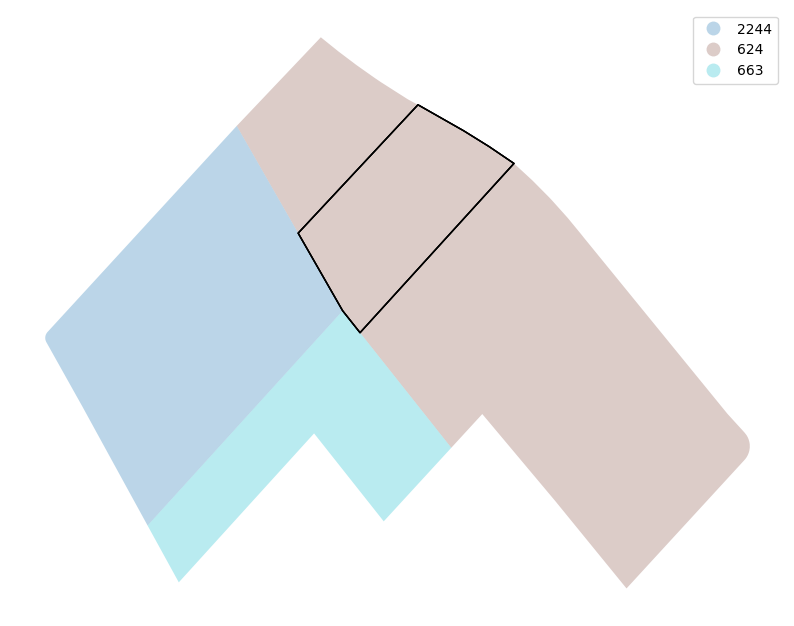

In [21]:
# identify parcel with overlapping zoning districts
# ----------
parcel508 = parcels_in_zd[parcels_in_zd["PARCELID"] == "508"]
zoning508 = zoning[zoning["FACILITYID"].isin(["624", "663", "2244"])]

# plot 
# ----------
fig, ax  = plt.subplots(figsize=(10,12))
ax.axis('off')

# plot zoning shapefile
zoning508.plot(ax = ax, column = 'FACILITYID', alpha = 0.3, legend = True)
# plot border of parcel
parcel508.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)


##### Visual check 2

The overlap in the second example parcel seems to be more complex since the boundaries of the parcel are firmly contained in two differ zoning districts. By calculating the area of the overlap in each zoning district, I have a sense of how much each parcel overlaps. For this analysis, I've decided it is sufficient to simply assign the parcel to the zoning district that has the greatest overlap. In a more complex analysis or one with different goals, I might create a zoning hierarchy whereby I assign the parcel based on the hierarchy, for example, I might assign a parcel to a residential zoning over a commercial zoning. 

In [22]:
# example case 2: this is a much messier example since the parcel overlaps much more equally with both zoning districts. 
# In this case, I'd want to keep parcel 12244 since the overlap area is larger. The visualization confirms this, albeit it is much more difficult to see
parcels_in_zd[parcels_in_zd["PARCELID"] == "1000027366"]

OBJECTID_left    PARCELID  INTID_left       APN LOTNUM PARCELTYPE  \
224906         415373  1000027366  1000027366  46255???   None        Tax   
224906         415373  1000027366  1000027366  46255???   None        Tax   

       FEATURECLA PLANCRT   PLANMOD LASTUPDATE_left NOTES_left COVERED  \
224906     Parcel  T-5612  AT24-010      2025-07-23       None      No   
224906     Parcel  T-5612  AT24-010      2025-07-23       None      No   

        SHAPE_Leng_left  SHAPE_Area_left CREATIONDA  \
224906       659.028878     16929.485228 2025-07-23   
224906       659.028878     16929.485228 2025-07-23   

                                                 geometry  OBJECTID_right  \
224906  POLYGON ((6167596.59 1921709.25, 6167600.382 1...         12244.0   
224906  POLYGON ((6167596.59 1921709.25, 6167600.382 1...          9207.0   

       FACILITYID  INTID_right ZONING ZONINGABBR REZONINGFI PDUSE PDDENSITY  \
224906      12244      12244.0  R-1-1      R-1-1       None  None         0   
224906       9207       9207.0  R-1-8      R-1-8       None  None         0   

       DEVELOPEDA APPROVALDA COLORCODE LASTUPDATE_right NOTES_right  \
224906       None       None         1       2022-04-22        None   
224906       None       None         1       2022-04-22        None   

        SHAPE_Leng_right  SHAPE_Area_right  overlap_area  
224906       1328.174162      50514.326282   9881.394168  
224906       4151.941871     310402.455183   7048.968324

<Axes: >

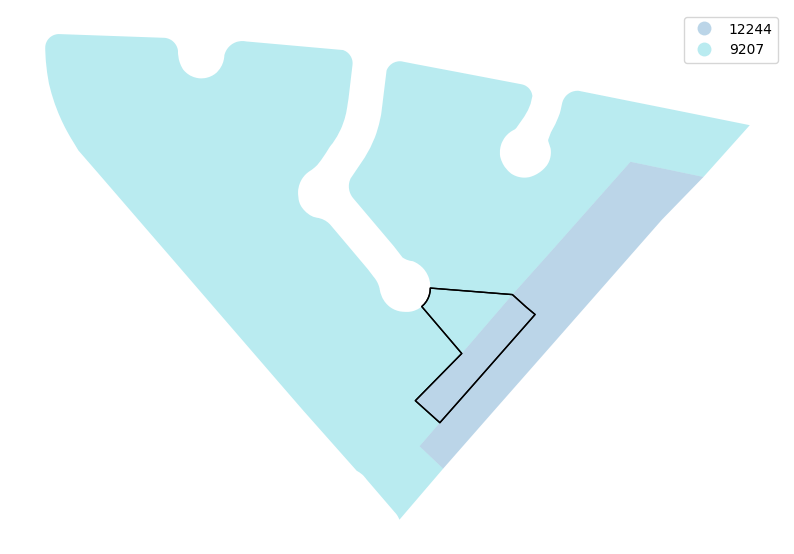

In [23]:
# identify parcel with overlapping zoning districts
# ----------
parcel1000027366 = parcels_in_zd[parcels_in_zd["PARCELID"] == "1000027366"]
zoning1000027366 = zoning[zoning["FACILITYID"].isin(["12244", "9207"])]


# plot 
# ----------
fig, ax  = plt.subplots(figsize=(10,12))
ax.axis('off')

# plot zoning shapefile
zoning1000027366.plot(ax = ax, column = 'FACILITYID', alpha = 0.3, legend = True)
# plot border of parcel
parcel1000027366.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)



#### 1.3 Remove multiple parcels
Now that I have visually inspected that the function worked, I want to choose only the one parcel that has the largest `overlap_area`. 

In [24]:
# remove multiple parcels
parcels_in_zd_unique = (
    # sort by PARCELID ascending but overlap_area descending, so largest overlap_area value is at top
    parcels_in_zd.sort_values(["PARCELID", "overlap_area"], ascending=[True, False])
          # drop duplicates but keep first record (which is the largest)
          .drop_duplicates(subset="PARCELID", keep="first")
          # reset index
          .reset_index(drop=True)
)

In [25]:
# check number of rows in parcel == number of rows in new parcel shapefile, meaning each parcel has one zoning district
# output should be true
parcels.shape[0] == parcels_in_zd_unique.shape[0]

True

#### 1.4 Count the number of parcels in each zone

Now I can sum the total parcels by zone to determine how many parcels are in each zone. I chose to plot the output to make the results more clear.


<positron-console-cell-26>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



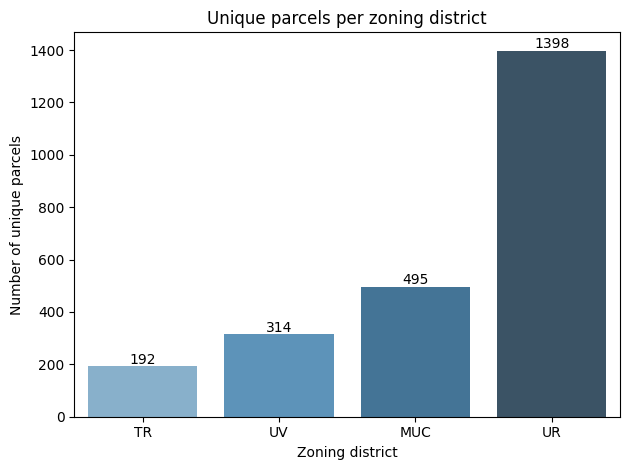

In [26]:
# Define the zones you want to filter
zones = ["UV", "MUC", "UR", "TR"]

# Count unique parcels per zoning district in one step
count = (
    parcels_in_zd_unique[parcels_in_zd_unique["ZONING"].isin(zones)]
    .groupby("ZONING")["PARCELID"]
    .nunique()
)

# Reset index and rename column
count_df = count.reset_index().rename(columns={'PARCELID': 'unique_parcels'})

# Sort by count
count_df = count_df.sort_values(by='unique_parcels', ascending=True)

# Create barplot
ax = sns.barplot(data=count_df, x='ZONING', y='unique_parcels', palette='Blues_d')

# Add text labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,   # center of the bar
        y=height + 10,                   # slightly above the bar
        s=int(height),                   # the count as integer
        ha='center'
    )

# Labels and title
plt.xlabel('Zoning district')
plt.ylabel('Number of unique parcels')
plt.title('Unique parcels per zoning district')
plt.tight_layout()
plt.show()


### 2. Total acreage across all parcels in each zone

**PROMPT:** Calculate the total acreage across all parcels in each zone. Which zone, Urban Village or
Urban Residential has the highest possible number of dwelling units based solely on the
maximum dwelling unit per acre (du/ac) allowance for 100% residential development? You will
need table Table 20-136 in the San Jose city code here. Also, please note the unit for the SHAPE_Area variable in the Parcel data set is in square feet.

**WHAT I DID** I first needed to convert 1 acre to square feet. A bit of googleing shows that `1 acre = 43,560 square feet.` I then subset my `parcels_in_zd_unique` shapefile to only include the 2 zones I wanted to focus on. I then sum the `SHAPE_Area_right` variable by the two zones and convert from square feet to acres. I then divide the total acreage by the upper and lower limits and see which zone has higher numbers. 

Based on [Table 20-136](https://library.municode.com/ca/san_jose/codes/code_of_ordinances?nodeId=TIT20ZO_CH20.55URVIMIUSZODI_PT2DERE_20.55.100DEST), **Urban residential** has the highest possible number of dwelling units based solely on the maximum dwelling unit per acre (du/ac) allowance for 100% residential development. 

#### 2.1 Subset to just two zoning districts

In [27]:

# Define the zones you want to filter
zones2 = ["UV", "UR"]

#  subset just the 4 zones
parcels_in_2_zones = parcels_in_zd_unique[parcels_in_zd_unique["ZONING"].isin(zones2)]

parcels_in_2_zones.head()

OBJECTID_left    PARCELID  INTID_left       APN LOTNUM PARCELTYPE  \
1013           2339  1000001688  1000001688  41221013   None        Tax   
1903         202959  1000003060  1000003060  47224111   None        Tax   
2389         209441  1000003699  1000003699  23502034   None        Tax   
2390           6399  1000003700  1000003700  23502033   None        Tax   
2622         202958  1000004030  1000004030  47720030      1        Tax   

     FEATURECLA PLANCRT PLANMOD LASTUPDATE_left  \
1013     Parcel  T-3756    None      2006-04-03   
1903     Parcel  T-9621    None      2006-05-05   
2389     Parcel     MGE    None      2022-12-19   
2390     Parcel     MGE    None      2006-04-04   
2622     Parcel     MGE    None      2006-07-24   

                              NOTES_left COVERED  SHAPE_Leng_left  \
1013                      Distance only.    None       254.996519   
1903                                None    None       437.231119   
2389  APN discrepancy, updated from 031.    None      1801.491831   
2390                                None    None      1016.858199   
2622                                None    None       411.916444   

      SHAPE_Area_left CREATIONDA  \
1013       509.127245 1900-01-01   
1903     11680.913709 1900-01-01   
2389     62811.757259 1900-01-01   
2390     64451.725602 1900-01-01   
2622     10202.866820 1900-01-01   

                                               geometry  OBJECTID_right  \
1013  POLYGON ((6145435.829 1926433.08, 6145437.15 1...         31155.0   
1903  POLYGON ((6161624.82 1945490.22, 6161647.59 19...         11873.0   
2389  POLYGON ((6151830.01 1958367.12, 6151921.86 19...         30314.0   
2390  POLYGON ((6151763.51 1958319.93, 6151894.86 19...         30314.0   
2622  POLYGON ((6167914.439 1939878.351, 6167969.276...          3132.0   

     FACILITYID  INTID_right ZONING ZONINGABBR REZONINGFI PDUSE PDDENSITY  \
1013      28843      28843.0     UR         UR    C22-121  None         0   
1903      11873      11873.0     UR         UR    C22-065  None         0   
2389      28768      28768.0     UV         UV    C23-088  None      None   
2390      28768      28768.0     UV         UV    C23-088  None      None   
2622       3132       3132.0     UR         UR    C22-121  None         0   

     DEVELOPEDA  APPROVALDA COLORCODE LASTUPDATE_right NOTES_right  \
1013       None  2023/06/13         6       2024-04-10    ORD30922   
1903       None  2022/08/30         6       2024-04-10        None   
2389       None  2023/05/16         7       2024-04-11        None   
2390       None  2023/05/16         7       2024-04-11        None   
2622       None  2023/06/13         6       2024-04-10    ORD30922   

      SHAPE_Leng_right  SHAPE_Area_right  overlap_area  
1013        254.996519        509.115978    509.115978  
1903       1174.776437      58009.454083  11680.910092  
2389       2288.775356     150285.909739  62811.741795  
2390       2288.775356     150285.909739  64451.725602  
2622        411.916444      10202.866820  10202.866820

#### 2.2 Calculate total acreage

In [28]:
# sum parcel areas by zoning (convert to acres)
total_acreage_by_zone = (
    parcels_in_2_zones.groupby('ZONING')['SHAPE_Area_right']
    .sum() / 43560  # convert square feet to acres
)

# turn into a DataFrame for ease of viewing
total_acreage_by_zone = total_acreage_by_zone.reset_index().rename(columns={'SHAPE_Area_right': 'total_acreage'})

# view
print(total_acreage_by_zone)



  ZONING  total_acreage
0     UR    5619.180377
1     UV    1032.238010


#### 2.3 Compare 

In [29]:
# UR 100% Residential du/ac : 30 - 95 
print(5619.180377/30)
print(5619.180377/95)


187.30601256666665
59.149267126315785


In [30]:
# UV 100% Residential du/ac : 55 - 250
print(1032.238010/55)
print(1032.238010/250)

18.76796381818182
4.12895204


Based on [Table 20-136](https://library.municode.com/ca/san_jose/codes/code_of_ordinances?nodeId=TIT20ZO_CH20.55URVIMIUSZODI_PT2DERE_20.55.100DEST), **Urban residential** has the highest possible number of dwelling units based solely on the maximum dwelling unit per acre (du/ac) allowance for 100% residential development. 

### 3. Number of Urban Village parcels within 1 mile of San Jose Diridon Station

**PROMPT:** Calculate the number of Urban Village parcels within a mile of the San Jose Diridon Station.

**WHAT I DID:** I first thought it might be easy to identify either a parcel designated as San Jose Diridon Station or a special zoning district but was unsuccessful and was not confident in what I did find. Next, I downloaded a shapefile for the railroad lines from the website provided. Although Diridon Station is a Caltrain line, the rail lines were not as helpful as I'd hoped in locating Diridon Station. Finally, I googled the coordinates in decimal degrees, set it as a point and spatially joined it to the parcel shapefile to identify all parcels within 1 mile. I found this to be the most reliable approach. 

#### 3.1 Spatial join

In [118]:

# 1. Ensure everything in projected CRS (meters) 
# Choose a local projection for San Jose (NAD83 / California zone 3 ft = EPSG:2227, or just Web Mercator EPSG:3857 for simplicity)
parcels_in_zd = parcels_in_zd.to_crs(epsg=3857)

# Diridon Station coordinates (lon, lat in WGS84)
diridon_station = gpd.GeoDataFrame(
    geometry=[Point(-121.9028, 37.3292)],
    crs="EPSG:4326"
).to_crs(parcels_in_zd.crs)

# 2. Buffer the point 
buffer_1mile = diridon_station.buffer(1609.34)   # 1 mile
buffer_2mile = diridon_station.buffer(2 * 1609.34)  # 2 miles

# 3. Subset parcels to only within 2 miles 
parcels_within_2mile = gpd.overlay(parcels_in_zd, gpd.GeoDataFrame(geometry=buffer_2mile, crs=parcels_in_zd.crs), how="intersection")

# 4. Identify UV parcels within 1 mile 
parcels_within_1mile = gpd.overlay(parcels_in_zd, gpd.GeoDataFrame(geometry=buffer_1mile, crs=parcels_in_zd.crs), how="intersection")
uv_within_1mile = parcels_within_1mile[parcels_within_1mile["ZONING"] == "UV"]




#### 3.2 Visualize

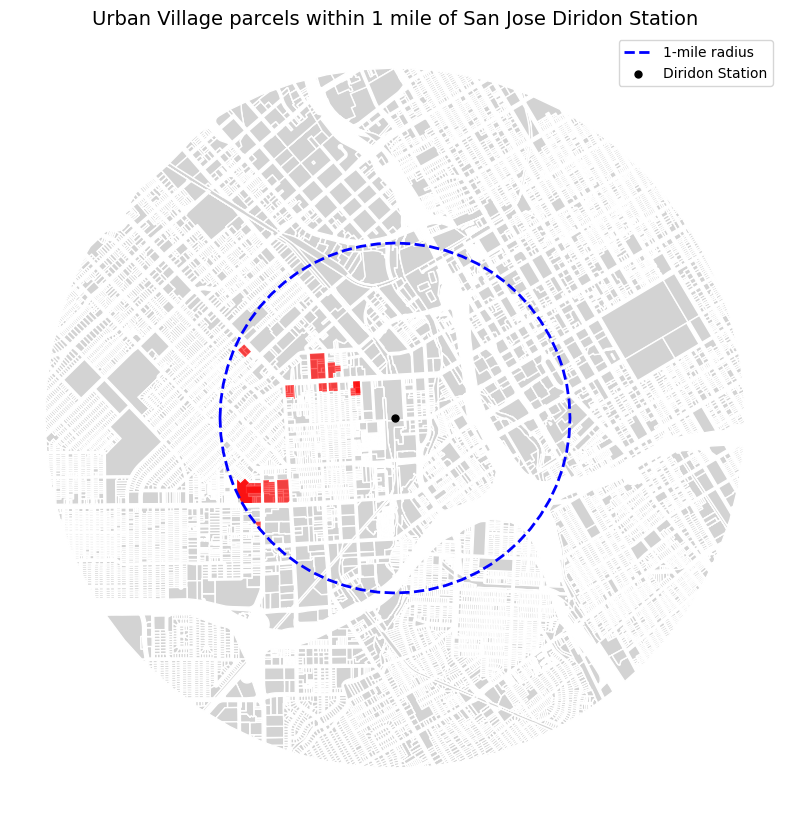

In [119]:

# 5. Plot 
fig, ax = plt.subplots(figsize=(10,10))

# add parcel base map (zoomed into 2-mile area for viewing)
parcels_within_2mile.plot(ax=ax, color="lightgrey", edgecolor="white")

# highlight only UV parcels within 1 mile
uv_within_1mile.plot(ax=ax, color="red", alpha=0.7)

# add buffers
buffer_1mile.boundary.plot(ax=ax, color="blue", linestyle="--", linewidth=2, label="1-mile radius")

# add station marker
diridon_station.plot(ax=ax, color="black", marker=".", markersize=100, label="Diridon Station")

# format
ax.set_title("Urban Village parcels within 1 mile of San Jose Diridon Station", fontsize=14)
ax.legend()
ax.axis('off')

plt.show()

#### 3.3 Count

In [34]:
print(f"Total parcels within 1 mile: {len(parcels_within_1mile)}")
print(f"Total UV parcels within 1 mile: {len(uv_within_1mile)}")

Total parcels within 1 mile: 4898
Total UV parcels within 1 mile: 79


### 4. San Jose and census data analysis

Choose two or three census characteristics related to evaluating aspects of opportunity,
economic mobility, or environmental sustainability near transit stations that might inform policy
design. Provide a 1-2 paragraph summary and at least one visualization that you think a San
Jose government official might want to see to better understand the characteristics of the area
within two miles of Diridon Station. As indicated in the data section above you can use whatever
source of census data you are most comfortable with. You may need to perform a geographic
crosswalk here, which you may do however you wish.

#### 4.1 get census data

I pulled 2018-2022 5-year ACS estimates on a number of census statistics. I then merged them with the shapefiles for the City of San Jose as described above. While block group data might have been helpful here because it is more granular, data below the census tract level can be unreliable, especially income and economic mobility data. 

In [120]:
# Define ACS variables (name → ACS code)
from pygris import validate_state
from pygris.data import get_census

acs_vars = {
    "median_age": "B01002_001E",
    "median_income": "B19013_001E",

    # Rent burden
    "total_renter_households": "B25070_001E",
    "rent_<15": "B25070_002E",
    "rent_15_19": "B25070_003E",
    "rent_20_24": "B25070_004E",
    "rent_25_29": "B25070_005E",
    "rent_30_34": "B25070_006E",
    "rent_35_39": "B25070_007E",
    "rent_40_49": "B25070_008E",
    "rent_50_plus": "B25070_009E",

    # Poverty
    "poverty_universe": "B17001_001E",
    "below_poverty": "B17001_002E",

    # Vehicle availability
    "total_households": "B08201_001E",
    "no_vehicle": "B08201_002E",

    # Tenure (renters vs owners)
    "tenure_total": "B25003_001E",
    "owner_occupied": "B25003_002E",
    "renter_occupied": "B25003_003E",

    # commute mode (B08301)
    "total_workers": "B08301_001E",
    "drove": "B08301_002E",
    "public_transit_total": "B08301_010E",
    "bus": "B08301_011E",
    "subway": "B08301_012E",
    "commuter_rail": "B08301_013E",  # long-distance train or commuter rail
    "light_rail": "B08301_014E",  # long-distance train or commuter rail
    "bike": "B08301_018E",
    "walked": "B08301_019E",
    "worked_home": "B08301_021E",

    # Median gross rent
    "median_rent": "B25064_001E",

    # Units in structure (B25024)
    "units_total": "B25024_001E",
    "units_1_detached": "B25024_002E",
    "units_1_attached": "B25024_003E",
    "units_2": "B25024_004E",
    "units_3_4": "B25024_005E",
    "units_5_9": "B25024_006E",
    "units_10_19": "B25024_007E",
    "units_20_49": "B25024_008E",
    "units_50_plus": "B25024_009E",
    "units_mobile": "B25024_010E",
    "units_other": "B25024_011E",

    # vacancy rate (B25002)
    "housing_units_total": "B25002_001E",
    "housing_units_occupied": "B25002_002E",
    "housing_units_vacant": "B25002_003E",

    # race/ethnicity (B02001 & B03003)
    "race_total": "B02001_001E",
    "white": "B02001_002E",
    "black": "B02001_003E",
    "asian": "B02001_005E",
    "hisp_total": "B03003_001E",
    "hispanic": "B03003_003E",

    # education (B15003)
    "edu_total": "B15003_001E",
    "bachelors": "B15003_022E",
    "masters": "B15003_023E",
    "professional": "B15003_024E",
    "doctorate": "B15003_025E",

    # Income inequality
    "gini": "B19083_001E"
}

# Pull ACS data
ca_acs = get_census(
    dataset="acs/acs5",
    variables=list(acs_vars.values()),
    year=2022,
    params={
        "for": "tract:*",
        "in": f"state:{validate_state('CA')}"
    },
    guess_dtypes=True,
    return_geoid=True
)

# Rename with friendly names
ca_acs = ca_acs.rename(columns={v: k for k, v in acs_vars.items()})

# Derived metrics
ca_acs["rent_burdened_count"] = (
    ca_acs["rent_30_34"] +
    ca_acs["rent_35_39"] +
    ca_acs["rent_40_49"] +
    ca_acs["rent_50_plus"]
)
ca_acs["rent_burdened_pct"] = ca_acs["rent_burdened_count"] / ca_acs["total_renter_households"] * 100
ca_acs["poverty_rate"] = ca_acs["below_poverty"] / ca_acs["poverty_universe"] * 100
ca_acs["no_vehicle_pct"] = ca_acs["no_vehicle"] / ca_acs["total_households"] * 100

# Tenure shares
ca_acs["pct_renters"] = ca_acs["renter_occupied"] / ca_acs["tenure_total"] * 100
ca_acs["pct_homeowners"] = ca_acs["owner_occupied"] / ca_acs["tenure_total"] * 100

# Commute mode shares
ca_acs["public_transit_pct"] = ca_acs["public_transit_total"] / ca_acs["total_workers"] * 100
ca_acs["drove_pct"] = ca_acs["drove"] / ca_acs["total_workers"] * 100
ca_acs["bike_pct"] = ca_acs["bike"] / ca_acs["total_workers"] * 100
ca_acs["walked_pct"] = ca_acs["walked"] / ca_acs["total_workers"] * 100
ca_acs["commuter_rail_pct"] = ca_acs["commuter_rail"] / ca_acs["total_workers"] * 100
ca_acs["light_rail_pct"] = ca_acs["light_rail"] / ca_acs["total_workers"] * 100
ca_acs["worked_home_pct"] = ca_acs["worked_home"] / ca_acs["total_workers"] * 100

# Aggregate units in structure
ca_acs["single_family_units"] = ca_acs["units_1_detached"] + ca_acs["units_1_attached"]
ca_acs["small_multifamily_units"] = ca_acs["units_2"] + ca_acs["units_3_4"]
ca_acs["medium_multifamily_units"] = ca_acs["units_5_9"] + ca_acs["units_10_19"]
ca_acs["large_multifamily_units"] = ca_acs["units_20_49"] + ca_acs["units_50_plus"]
ca_acs["other_units"] = ca_acs["units_mobile"] + ca_acs["units_other"]

# Percent distribution of units
ca_acs["pct_single_family"] = ca_acs["single_family_units"] / ca_acs["units_total"] * 100
ca_acs["pct_small_multifamily"] = ca_acs["small_multifamily_units"] / ca_acs["units_total"] * 100
ca_acs["pct_medium_multifamily"] = ca_acs["medium_multifamily_units"] / ca_acs["units_total"] * 100
ca_acs["pct_large_multifamily"] = ca_acs["large_multifamily_units"] / ca_acs["units_total"] * 100
ca_acs["pct_other"] = ca_acs["other_units"] / ca_acs["units_total"] * 100

# Vacancy
ca_acs["vacancy_rate"] = ca_acs["housing_units_vacant"] / ca_acs["housing_units_total"] * 100

# Race shares
ca_acs["pct_white"] = ca_acs["white"] / ca_acs["race_total"] * 100
ca_acs["pct_black"] = ca_acs["black"] / ca_acs["race_total"] * 100
ca_acs["pct_asian"] = ca_acs["asian"] / ca_acs["race_total"] * 100
ca_acs["pct_latino"] = ca_acs["hispanic"] / ca_acs["hisp_total"] * 100

# College degree+
ca_acs["college_plus"] = (
    ca_acs["bachelors"] +
    ca_acs["masters"] +
    ca_acs["professional"] +
    ca_acs["doctorate"]
)
ca_acs["pct_college_plus"] = ca_acs["college_plus"] / ca_acs["edu_total"] * 100


# Preview
ca_acs.head()


Using FIPS code '06' for input 'CA'


median_age  median_income  total_renter_households  rent_<15  rent_15_19  \
0        50.8       234236.0                      127        20           8   
1        43.4       225500.0                      386        69          43   
2        37.8       164000.0                     1691       182         173   
3        37.4       158836.0                      887       141         106   
4        37.1        95078.0                      878        19         107   

   rent_20_24  rent_25_29  rent_30_34  rent_35_39  rent_40_49  rent_50_plus  \
0          81           0          10           0           0             8   
1          80          41         111           9           0             5   
2         296         151         183         205         146            93   
3         244         153          40          15           0            17   
4         119          50         168          99          23            55   

   poverty_universe  below_poverty  total_households  no_vehicle  \
0              3248            142              1377          95   
1              2147            161               876          83   
2              5592            396              2638         367   
3              4226            419              1760         249   
4              3941            409              1679         143   

   tenure_total  owner_occupied  renter_occupied  total_workers  drove  \
0          1377            1250              127           1582    771   
1           876             490              386           1124    312   
2          2638             947             1691           3301   1033   
3          1760             873              887           2455    922   
4          1679             801              878           2210    967   

   public_transit_total  bus  subway  commuter_rail  light_rail  bike  walked  \
0                   145   41      95              9           0     0      92   
1                   287   14     253             20           0    37      21   
2                   921   52     704            136          29   106      97   
3                   516   48     436             32           0   155     110   
4                   395   68     292             24          11   124      37   

   worked_home        GEOID  median_rent  units_total  units_1_detached  \
0          564  06001400100       3501.0         1496              1100   
1          455  06001400200       2500.0          913               579   
2         1077  06001400300       2335.0         2851              1224   
3          706  06001400400       2373.0         1975               935   
4          673  06001400500       2175.0         1820               821   

   units_1_attached  units_2  units_3_4  units_5_9  units_10_19  units_20_49  \
0               360        0          0          8            0            0   
1                17       23         73        105          104            9   
2                64      230        421        278           55          237   
3               130      270        335        188           48           69   
4               135      198        230        185          207           36   

   units_50_plus  units_mobile  units_other  housing_units_total  \
0              0            28            0                 1496   
1              3             0            0                  913   
2            342             0            0                 2851   
3              0             0            0                 1975   
4              8             0            0                 1820   

   housing_units_occupied  housing_units_vacant  race_total  white  black  \
0                    1377                   119        3269   2385    171   
1                     876                    37        2147   1535     38   
2                    2638                   213        5619   3403    529   
3                    1760                   215        4278   2

#### 4.2 get tract and place data

In [121]:
# tracts
from pygris import tracts
ca_tracts = tracts(state = "CA", cb = True, year=2022, cache=True) 

# places
from pygris import places
ca_places = places(state = "CA", cb = True, year=2022, cache=True) #

Using FIPS code '06' for input 'CA'
Using FIPS code '06' for input 'CA'


#### 4.3 merge tract and place data 

<positron-console-cell-122>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



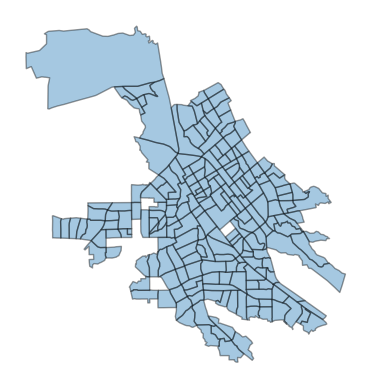

In [122]:
# get San Jose boundary
san_jose = ca_places[ca_places["NAME"] == "San Jose"]

# copy tract shapefile and create a centroid column
tracts_centroids = ca_tracts.copy()
tracts_centroids["centroid"] = tracts_centroids.centroid

# spatial join using centroids but keep original tract geometries
san_jose_tracts = gpd.sjoin(
    tracts_centroids.set_geometry("centroid"),  # use centroid for join
    san_jose,
    predicate="within"
).drop(columns="geometry")  # drop centroid geometry after join

# restore original tract geometries for mapping/visualizations
san_jose_tracts = san_jose_tracts.set_geometry(tracts_centroids.geometry)

# plot
check = san_jose_tracts.plot(edgecolor="black", alpha = .4)
check.set_axis_off()


#### 4.4 merge in acs data

In [123]:
san_jose_tracts_with_acs = san_jose_tracts.merge(
    ca_acs,
    left_on="GEOID_left",   # from tracts
    right_on="GEOID",  # from ACS
    how="left"          # keeps all tracts, adds ACS data
)
san_jose_tracts_with_acs.head()

STATEFP_left COUNTYFP TRACTCE         AFFGEOID_left   GEOID_left NAME_left  \
0           06      085  500100  1400000US06085500100  06085500100      5001   
1           06      085  503210  1400000US06085503210  06085503210   5032.10   
2           06      085  512030  1400000US06085512030  06085512030   5120.30   
3           06      085  503510  1400000US06085503510  06085503510   5035.10   
4           06      085  506202  1400000US06085506202  06085506202   5062.02   

          NAMELSAD_left STUSPS_left          NAMELSADCO STATE_NAME_left  \
0     Census Tract 5001          CA  Santa Clara County      California   
1  Census Tract 5032.10          CA  Santa Clara County      California   
2  Census Tract 5120.30          CA  Santa Clara County      California   
3  Census Tract 5035.10          CA  Santa Clara County      California   
4  Census Tract 5062.02          CA  Santa Clara County      California   

  LSAD_left  ALAND_left  AWATER_left                     centroid  \
0        CT     1922120            0  POINT (-121.89279 37.35849)   
1        CT     1595929            0  POINT (-121.82275 37.29039)   
2        CT     1191726            0  POINT (-121.82418 37.23267)   
3        CT     1032932            0   POINT (-121.81962 37.3494)   
4        CT     2514795            0  POINT (-121.99044 37.30112)   

   index_right STATEFP_right PLACEFP   PLACENS    AFFGEOID_right GEOID_right  \
0           85            06   68000  02411790  1600000US0668000     0668000   
1           85            06   68000  02411790  1600000US0668000     0668000   
2           85            06   68000  02411790  1600000US0668000     0668000   
3           85            06   68000  02411790  1600000US0668000     0668000   
4           85            06   68000  02411790  1600000US0668000     0668000   

  NAME_right NAMELSAD_right STUSPS_right STATE_NAME_right LSAD_right  \
0   San Jose  San Jose city           CA       California         25   
1   San Jose  San Jose city           CA       California         25   
2   San Jose  San Jose city           CA       California         25   
3   San Jose  San Jose city           CA       California         25   
4   San Jose  San Jose city           CA       California         25   

   ALAND_right  AWATER_right  \
0    460811249       8089813   
1    460811249       8089813   
2    460811249       8089813   
3    460811249       8089813   
4    460811249       8089813   

                                            geometry  median_age  \
0  POLYGON ((-121.90278 37.36256, -121.90178 37.3...        34.2   
1  POLYGON ((-121.83321 37.29342, -121.82894 37.2...        38.4   
2  POLYGON ((-121.83061 37.23687, -121.82592 37.2...        40.8   
3  POLYGON ((-121.82701 37.35083, -121.81915 37.3...        31.9   
4  POLYGON ((-122.00259 37.29484, -122.00179 37.2...        42.2   

   median_income  total_renter_households  rent_<15  rent_15_19  rent_20_24  \
0       154868.0                     1779         0         389         171   
1       113113.0                      336         0          32          17   
2       182344.0                       89         0           0          12   
3       101607.0                      465        10           8           0   
4       175179.0                      992        18          93         197   

   rent_25_29  rent_30_34  rent_35_39  rent_40_49  rent_50_plus  \
0         266         185          79          77           137   
1          75          18          43          11            42   
2           7           6           6           6             0   
3         124          25          50         113            55   
4         225          62          99          35           163   

   poverty_universe  below_poverty  total_households  no_vehicle  \
0              7850            698              2872          88   
1              4419            118               990          78   
2              2922             69               905     

#### 4.5 identify tracts within 2 miles of diridon station 

In [135]:
from shapely.geometry import Point

# 1. Create Diridon buffer (reproject to meters for proper distance)
diridon_station = gpd.GeoDataFrame(
    geometry=[Point(-121.9028, 37.3292)],
    crs="EPSG:4326"
)
diridon_buffer = diridon_station.to_crs(epsg=3310).buffer(3218)  # 2 miles ≈ 3218 meters

# 2. Reproject tracts to same CRS
tracts_proj = san_jose_tracts_with_acs.to_crs(epsg=3310)

# 3. Add a new column: 1 if tract intersects buffer, else 0
tracts_proj["within_2mi_diridon"] = tracts_proj.geometry.intersects(diridon_buffer.geometry.iloc[0]).astype(int)

# 4. bring back to original CRS
san_jose_tracts_with_acs = tracts_proj.to_crs(san_jose_tracts_with_acs.crs)

# 5. add categorical for mapping
san_jose_tracts_with_acs["within_2mi_diridon_cat"] = san_jose_tracts_with_acs["within_2mi_diridon"].map({
    0: "Outside 2 miles of station",
    1: "Within 2 miles of station"
})



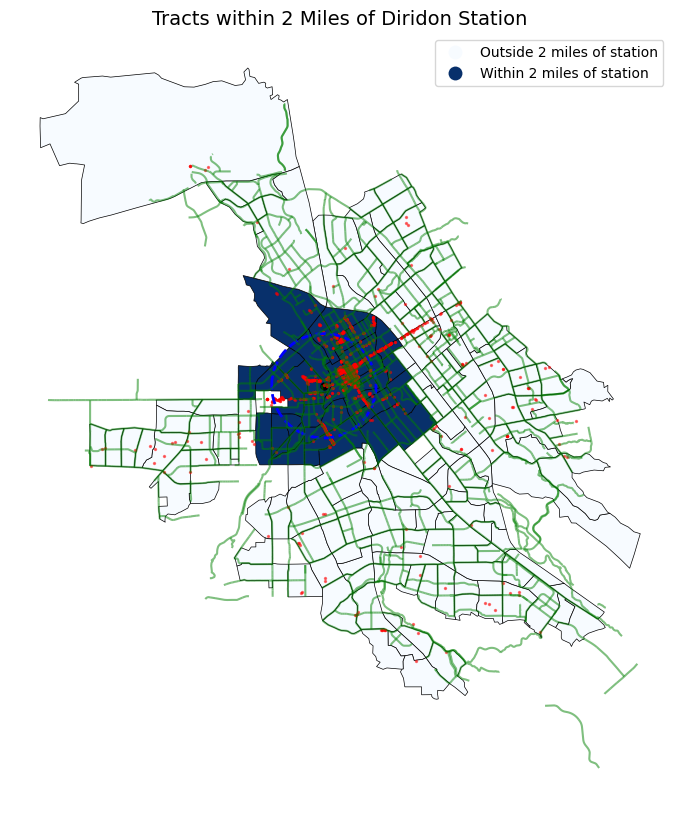

In [136]:
# plot
diridon_station = diridon_station.to_crs(epsg=4269) 
buffer_2mile = buffer_2mile.to_crs(epsg=4269) 
railroad = railroad.to_crs(epsg=4269) 
bikeways = bikeways.to_crs(epsg=4269) 
parking = parking.to_crs(epsg=4269) 
bikeracks = bikeracks.to_crs(epsg=4269) 

# Map the column values to colors
colors = san_jose_tracts_with_acs["within_2mi_diridon"].map(color_map)

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")

# Plot tract shapefile colored by rent-burdened percent
san_jose_tracts_with_acs.plot(
    ax=ax,
    column="within_2mi_diridon_cat",
    categorical=True,       # <- treat values as categories
    legend=True,
    cmap="Blues",        # Monotonic blue color scale
    edgecolor="black",   # optional: makes tract borders visible
    linewidth=0.5
)

# add station marker
diridon_station.plot(ax=ax, color="black", marker=".", markersize=100, label="Diridon Station")
buffer_2mile.boundary.plot(ax=ax, color="blue", linestyle="--", linewidth=2, label="1-mile radius")

#railroad.plot(ax = ax, column = 'NAME', legend = True)
bikeways.plot(ax = ax, color = 'green', alpha = 0.5, legend = True)
bikeracks.plot(ax = ax, color = 'red', alpha = 0.5, markersize = 2, legend = True)
#parking.plot(ax = ax, color = 'black', alpha = 0.9, legend = True)


# Add title
ax.set_title("Tracts within 2 Miles of Diridon Station", fontsize=14)
plt.show()

#### 4.6 Add equity score

In [137]:
#### 4.6 Add equity score data

geometry = san_jose_tracts_with_acs.geometry

# Merge equity data into the GeoDataFrame
san_jose_tracts_with_acs_equity = san_jose_tracts_with_acs.merge(
    equity,
    left_on="GEOID_left",
    right_on="FIPSCODE",
    how="left"
)

san_jose_tracts_with_acs_equity = gpd.GeoDataFrame(
    san_jose_tracts_with_acs_equity,
    geometry=geometry,
    crs=san_jose_tracts_with_acs.crs
)

san_jose_tracts_with_acs_equity.head()



STATEFP_left COUNTYFP TRACTCE         AFFGEOID_left   GEOID_left NAME_left  \
0           06      085  500100  1400000US06085500100  06085500100      5001   
1           06      085  503210  1400000US06085503210  06085503210   5032.10   
2           06      085  512030  1400000US06085512030  06085512030   5120.30   
3           06      085  503510  1400000US06085503510  06085503510   5035.10   
4           06      085  506202  1400000US06085506202  06085506202   5062.02   

          NAMELSAD_left STUSPS_left          NAMELSADCO STATE_NAME_left  \
0     Census Tract 5001          CA  Santa Clara County      California   
1  Census Tract 5032.10          CA  Santa Clara County      California   
2  Census Tract 5120.30          CA  Santa Clara County      California   
3  Census Tract 5035.10          CA  Santa Clara County      California   
4  Census Tract 5062.02          CA  Santa Clara County      California   

  LSAD_left  ALAND_left  AWATER_left                     centroid  \
0        CT     1922120            0  POINT (-121.89279 37.35849)   
1        CT     1595929            0  POINT (-121.82275 37.29039)   
2        CT     1191726            0  POINT (-121.82418 37.23267)   
3        CT     1032932            0   POINT (-121.81962 37.3494)   
4        CT     2514795            0  POINT (-121.99044 37.30112)   

   index_right STATEFP_right PLACEFP   PLACENS    AFFGEOID_right GEOID_right  \
0           85            06   68000  02411790  1600000US0668000     0668000   
1           85            06   68000  02411790  1600000US0668000     0668000   
2           85            06   68000  02411790  1600000US0668000     0668000   
3           85            06   68000  02411790  1600000US0668000     0668000   
4           85            06   68000  02411790  1600000US0668000     0668000   

  NAME_right NAMELSAD_right STUSPS_right STATE_NAME_right LSAD_right  \
0   San Jose  San Jose city           CA       California         25   
1   San Jose  San Jose city           CA       California         25   
2   San Jose  San Jose city           CA       California         25   
3   San Jose  San Jose city           CA       California         25   
4   San Jose  San Jose city           CA       California         25   

   ALAND_right  AWATER_right  \
0    460811249       8089813   
1    460811249       8089813   
2    460811249       8089813   
3    460811249       8089813   
4    460811249       8089813   

                                          geometry_x  median_age  \
0  POLYGON ((-121.90278 37.36256, -121.90178 37.3...        34.2   
1  POLYGON ((-121.83321 37.29342, -121.82894 37.2...        38.4   
2  POLYGON ((-121.83061 37.23687, -121.82592 37.2...        40.8   
3  POLYGON ((-121.82701 37.35083, -121.81915 37.3...        31.9   
4  POLYGON ((-122.00259 37.29484, -122.00179 37.2...        42.2   

   median_income  total_renter_households  rent_<15  rent_15_19  rent_20_24  \
0       154868.0                     1779         0         389         171   
1       113113.0                      336         0          32          17   
2       182344.0                       89         0           0          12   
3       101607.0                      465        10           8           0   
4       175179.0                      992        18          93         197   

   rent_25_29  rent_30_34  rent_35_39  rent_40_49  rent_50_plus  \
0         266         185          79          77           137   
1          75          18          43          11            42   
2           7           6           6           6             0   
3         124          25          50         113            55   
4         225          62          99          35           163   

   poverty_universe  below_poverty  total_households  no_vehicle  \
0              7850            698              2872          88   
1              4419            118               990          78   
2              2922             69               905     

#### 4.7 Visualize

I then create a set of maps to better visualize the 

In [ ]:
import matplotlib.pyplot as plt
import mapclassify

def choropleth_map(
    gdf, 
    column, 
    title, 
    station_gdf=None, 
    buffer_gdf=None, 
    k=5, 
    cmap="Blues",
    save=False,
    filename="../output/choropleth_map.pdf"
):
    """
    Create a choropleth map of a GeoDataFrame with optional station and buffer overlays.
    Can optionally save the figure to a file.
    
    Parameters:
        gdf (GeoDataFrame): Main GeoDataFrame to plot.
        column (str): Column name to color the choropleth.
        title (str): Title of the plot.
        station_gdf (GeoDataFrame, optional): GeoDataFrame for station points.
        buffer_gdf (GeoDataFrame, optional): GeoDataFrame for buffer outlines.
        k (int): Number of classes for NaturalBreaks.
        cmap (str): Matplotlib colormap name.
        save (bool): If True, saves the figure to `filename`.
        filename (str): Name/path of the saved figure file.
    """
    
    # Ensure consistent CRS
    gdf = gdf.to_crs(epsg=4269)
    if station_gdf is not None:
        station_gdf = station_gdf.to_crs(epsg=4269)
    if buffer_gdf is not None:
        buffer_gdf = buffer_gdf.to_crs(epsg=4269)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis("off")
    
    # Plot main choropleth
    gdf.plot(
        ax=ax,
        column=column,
        scheme="NaturalBreaks",
        k=k,
        legend=True,
        cmap=cmap,
        edgecolor="black",
        linewidth=0.5
    )
    
    # Overlay station points
    if station_gdf is not None:
        station_gdf.plot(
            ax=ax, color="black", marker=".", markersize=100, label="Station"
        )
    
    # Overlay buffer outlines
    if buffer_gdf is not None:
        buffer_gdf.boundary.plot(
            ax=ax, color="blue", linestyle="--", linewidth=2, label="Buffer"
        )
    
    # Add title
    ax.set_title(title, fontsize=14)
    
    # Save if requested
    if save:
        plt.savefig(filename, format="pdf", bbox_inches="tight")
        print(f"Figure saved as {filename}")
    
    plt.show()


In [149]:
import matplotlib.pyplot as plt
import mapclassify

def choropleth_map(
    gdf, 
    column, 
    title, 
    station_gdf=None, 
    buffer_gdf=None, 
    k=5, 
    cmap="Blues",
    save=False,
    filename="../output/choropleth_map.pdf",
    notes=None
):
    """
    Create a choropleth map of a GeoDataFrame with optional station and buffer overlays.
    Can optionally save the figure to a file and add notes at the bottom.
    
    Parameters:
        gdf (GeoDataFrame): Main GeoDataFrame to plot.
        column (str): Column name to color the choropleth.
        title (str): Title of the plot.
        station_gdf (GeoDataFrame, optional): GeoDataFrame for station points.
        buffer_gdf (GeoDataFrame, optional): GeoDataFrame for buffer outlines.
        k (int, optional): Number of classes for NaturalBreaks. Defaults to 5.
        cmap (str): Matplotlib colormap name.
        save (bool): If True, saves the figure to `filename`.
        filename (str): Name/path of the saved figure file.
        notes (str, optional): Optional text to display at the bottom of the figure.
    """
    
    # Ensure consistent CRS
    gdf = gdf.to_crs(epsg=4269)
    if station_gdf is not None:
        station_gdf = station_gdf.to_crs(epsg=4269)
    if buffer_gdf is not None:
        buffer_gdf = buffer_gdf.to_crs(epsg=4269)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis("off")
    
    # Plot main choropleth
    gdf.plot(
        ax=ax,
        column=column,
        scheme="NaturalBreaks",
        k=k,
        legend=True,
        cmap=cmap,
        edgecolor="black",
        linewidth=0.5
    )
    
    # Overlay station points
    if station_gdf is not None:
        station_gdf.plot(
            ax=ax, color="black", marker=".", markersize=100, label="Station"
        )
    
    # Overlay buffer outlines
    if buffer_gdf is not None:
        buffer_gdf.boundary.plot(
            ax=ax, color="blue", linestyle="--", linewidth=2, label="Buffer"
        )
    
    # Add title
    ax.set_title(title, fontsize=14)
    
    # Add notes at the bottom if provided
    if notes:
        fig.text(0.1, 0.01, notes, ha='left', fontsize=10)
    
    # Save if requested
    if save:
        plt.savefig(filename, format="pdf", bbox_inches="tight")
        print(f"Figure saved as {filename}")

    
    plt.show()


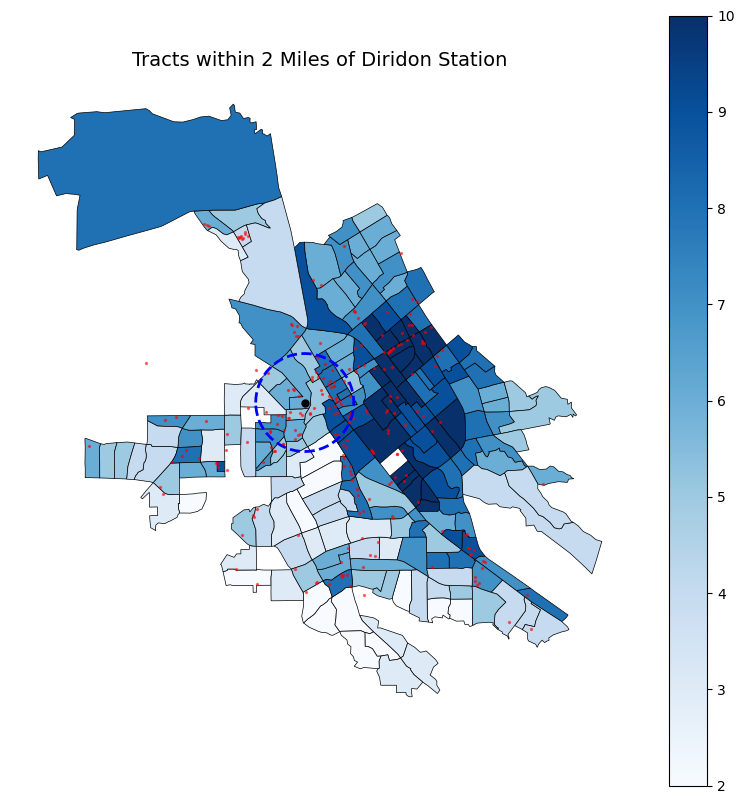

In [153]:

# plot
diridon_station = diridon_station.to_crs(epsg=4269) 
buffer_2mile = buffer_2mile.to_crs(epsg=4269) 
railroad = railroad.to_crs(epsg=4269) 
bikeways = bikeways.to_crs(epsg=4269) 
parking = parking.to_crs(epsg=4269) 
bikeracks = bikeracks.to_crs(epsg=4269) 
affordable_housing = affordable_housing.to_crs(epsg=4269) 


fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")

# Plot tract shapefile colored by rent-burdened percent
san_jose_tracts_with_acs_equity.plot(
    ax=ax,
    column="EQUITYSC_2",
    k = 3, 
    legend=True,
    cmap="Blues",        # Monotonic blue color scale
    edgecolor="black",   # optional: makes tract borders visible
    linewidth=0.5
)

# add station marker
diridon_station.plot(ax=ax, color="black", marker=".", markersize=100, label="Diridon Station")
buffer_2mile.boundary.plot(ax=ax, color="blue", linestyle="--", linewidth=2, label="1-mile radius")

affordable_housing.plot(ax = ax, color = 'red', alpha = 0.5, markersize = 2)


# Add title
ax.set_title("Tracts within 2 Miles of Diridon Station", fontsize=14)
plt.show()

Figure saved as ../output/bike_map.pdf


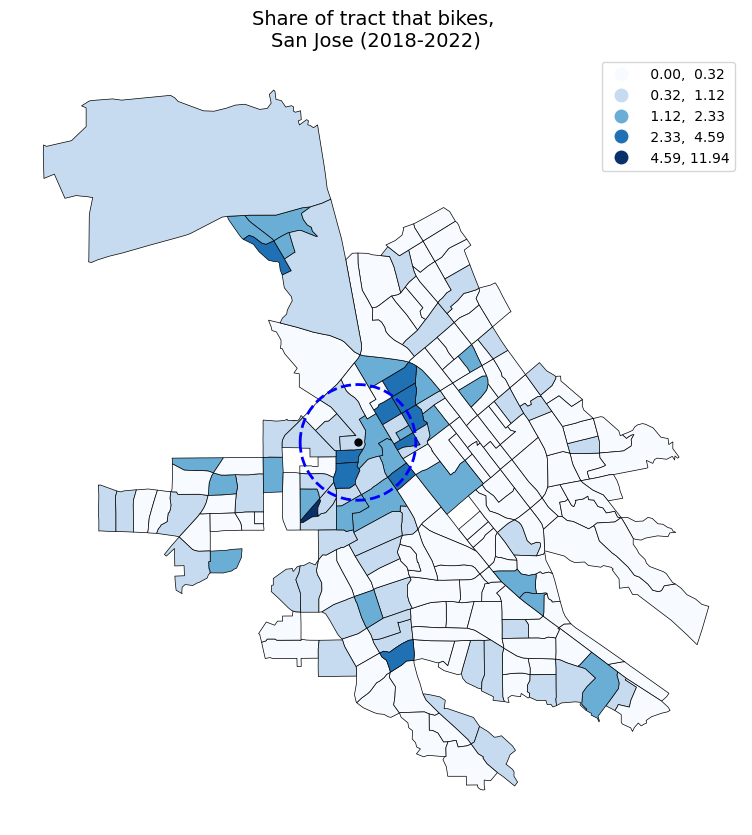

In [142]:
# bikes
choropleth_map(
    gdf=san_jose_tracts_with_acs,
    column="bike_pct",
    title="Share of tract that bikes, \nSan Jose (2018-2022)",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    save=True,
    filename="../output/bike_map.pdf"
)


Figure saved as ../output/walks_map.pdf


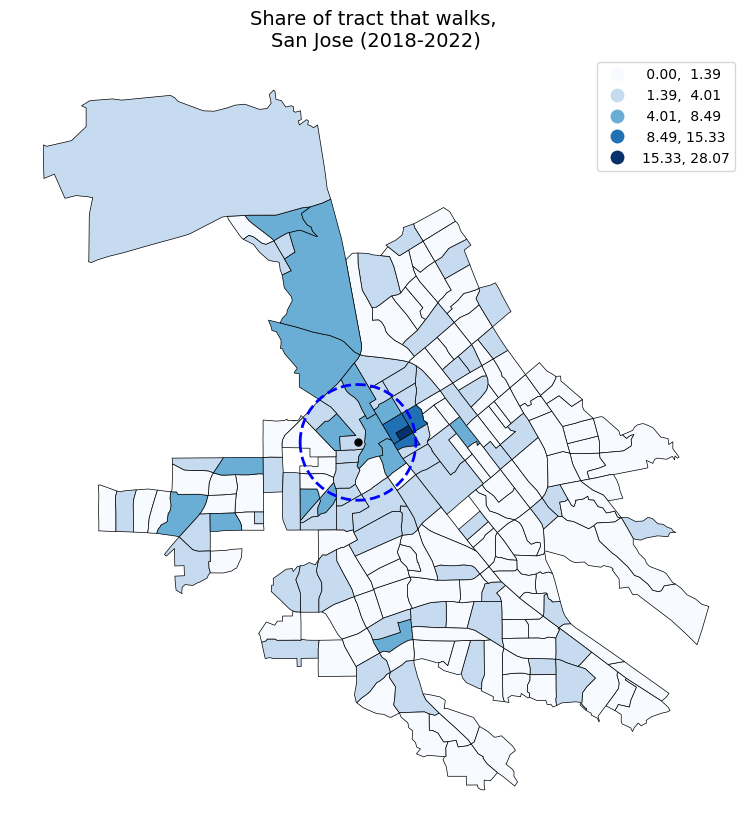

In [50]:
# walks
choropleth_map(
    gdf=san_jose_tracts_with_acs,
    column="walked_pct",
    title="Share of tract that walks, \nSan Jose (2018-2022)",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    save=True,
    filename="../output/maps/walks_map.pdf"
)



Figure saved as ../output/maps/equity_score.pdf


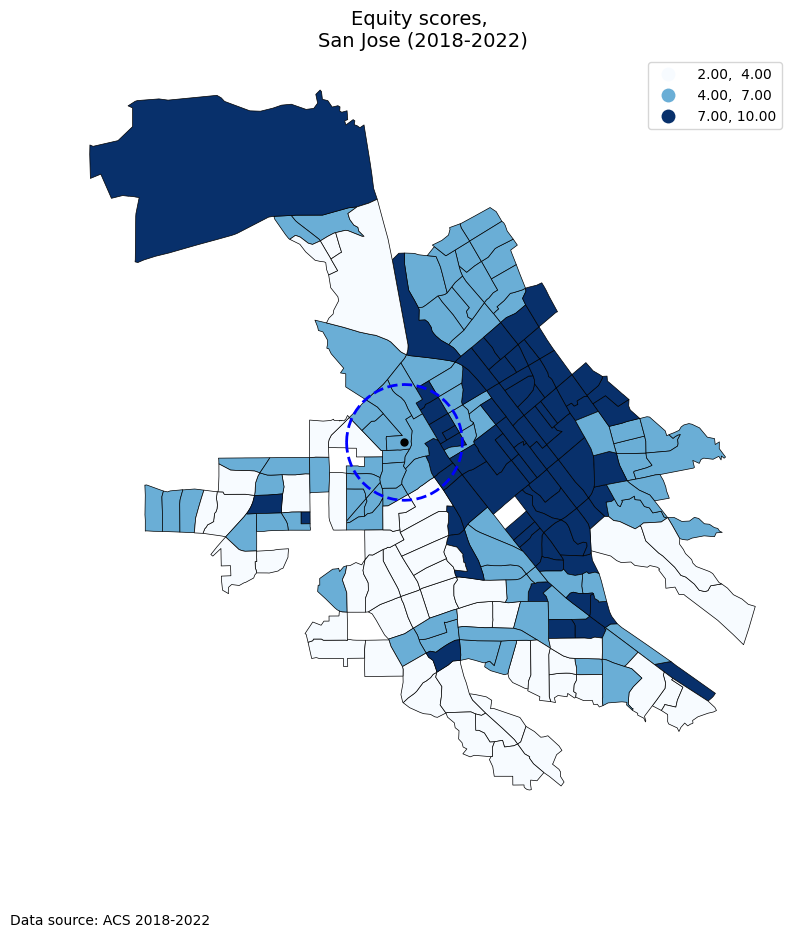

In [ ]:
# walks
choropleth_map(
    gdf=san_jose_tracts_with_acs_equity,
    column="EQUITYSC_2", # combined equity score
    title="Equity scores, \nSan Jose (2018-2022)",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    k = 3,
    notes="Data source: ACS 2018-2022",
    save=True,
    filename="../output/maps/equity_score.pdf"
)


In [115]:
san_jose_tracts_with_acs_equity.head()

STATEFP_left COUNTYFP TRACTCE         AFFGEOID_left   GEOID_left NAME_left  \
0           06      085  500100  1400000US06085500100  06085500100      5001   
1           06      085  503210  1400000US06085503210  06085503210   5032.10   
2           06      085  512030  1400000US06085512030  06085512030   5120.30   
3           06      085  503510  1400000US06085503510  06085503510   5035.10   
4           06      085  506202  1400000US06085506202  06085506202   5062.02   

          NAMELSAD_left STUSPS_left          NAMELSADCO STATE_NAME_left  \
0     Census Tract 5001          CA  Santa Clara County      California   
1  Census Tract 5032.10          CA  Santa Clara County      California   
2  Census Tract 5120.30          CA  Santa Clara County      California   
3  Census Tract 5035.10          CA  Santa Clara County      California   
4  Census Tract 5062.02          CA  Santa Clara County      California   

  LSAD_left  ALAND_left  AWATER_left                     centroid  \
0        CT     1922120            0  POINT (-121.89279 37.35849)   
1        CT     1595929            0  POINT (-121.82275 37.29039)   
2        CT     1191726            0  POINT (-121.82418 37.23267)   
3        CT     1032932            0   POINT (-121.81962 37.3494)   
4        CT     2514795            0  POINT (-121.99044 37.30112)   

   index_right STATEFP_right PLACEFP   PLACENS    AFFGEOID_right GEOID_right  \
0           85            06   68000  02411790  1600000US0668000     0668000   
1           85            06   68000  02411790  1600000US0668000     0668000   
2           85            06   68000  02411790  1600000US0668000     0668000   
3           85            06   68000  02411790  1600000US0668000     0668000   
4           85            06   68000  02411790  1600000US0668000     0668000   

  NAME_right NAMELSAD_right STUSPS_right STATE_NAME_right LSAD_right  \
0   San Jose  San Jose city           CA       California         25   
1   San Jose  San Jose city           CA       California         25   
2   San Jose  San Jose city           CA       California         25   
3   San Jose  San Jose city           CA       California         25   
4   San Jose  San Jose city           CA       California         25   

   ALAND_right  AWATER_right  \
0    460811249       8089813   
1    460811249       8089813   
2    460811249       8089813   
3    460811249       8089813   
4    460811249       8089813   

                                          geometry_x  median_age  \
0  POLYGON ((-121.90278 37.36256, -121.90178 37.3...        34.2   
1  POLYGON ((-121.83321 37.29342, -121.82894 37.2...        38.4   
2  POLYGON ((-121.83061 37.23687, -121.82592 37.2...        40.8   
3  POLYGON ((-121.82701 37.35083, -121.81915 37.3...        31.9   
4  POLYGON ((-122.00259 37.29484, -122.00179 37.2...        42.2   

   median_income  total_renter_households  rent_<15  rent_15_19  rent_20_24  \
0       154868.0                     1779         0         389         171   
1       113113.0                      336         0          32          17   
2       182344.0                       89         0           0          12   
3       101607.0                      465        10           8           0   
4       175179.0                      992        18          93         197   

   rent_25_29  rent_30_34  rent_35_39  rent_40_49  rent_50_plus  \
0         266         185          79          77           137   
1          75          18          43          11            42   
2           7           6           6           6             0   
3         124          25          50         113            55   
4         225          62          99          35           163   

   poverty_universe  below_poverty  total_households  no_vehicle  \
0              7850            698              2872          88   
1              4419            118               990          78   
2              2922             69               905     

#### 4.9 Comparison figures

<positron-console-cell-117>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



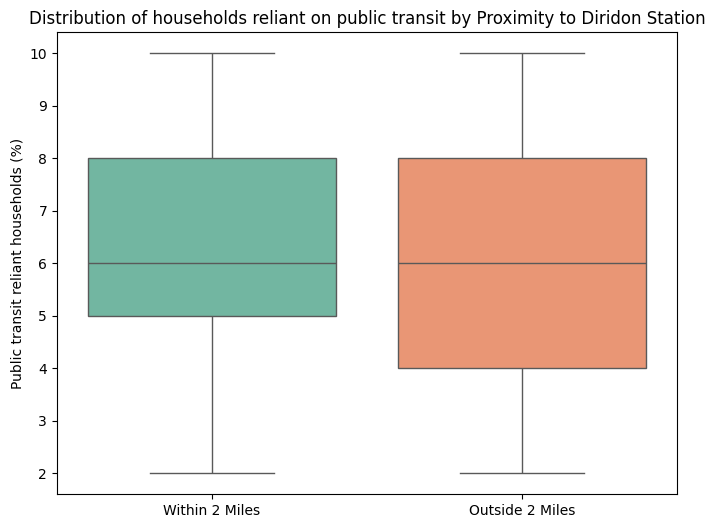

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'within_2mi_diridon' column exists as 0/1
# 1 = within 2 miles, 0 = outside
# Example: san_jose_tracts_with_acs['within_2mi_diridon'] already exists

# Map to labels for readability
san_jose_tracts_with_acs_equity['Proximity'] = san_jose_tracts_with_acs_equity['within_2mi_diridon'].map({0: "Outside 2 Miles", 1: "Within 2 Miles"})

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Proximity',
    y='EQUITYSC_2',
    #y='bike_pct',
    data=san_jose_tracts_with_acs_equity,
    palette="Set2"
)
plt.title("Distribution of households reliant on public transit by Proximity to Diridon Station")
plt.ylabel("Public transit reliant households (%)")
plt.xlabel("")

# save figure 
plt.savefig("../output/public_transit_figure.pdf", format="pdf", bbox_inches="tight")

plt.show()



<positron-console-cell-372>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



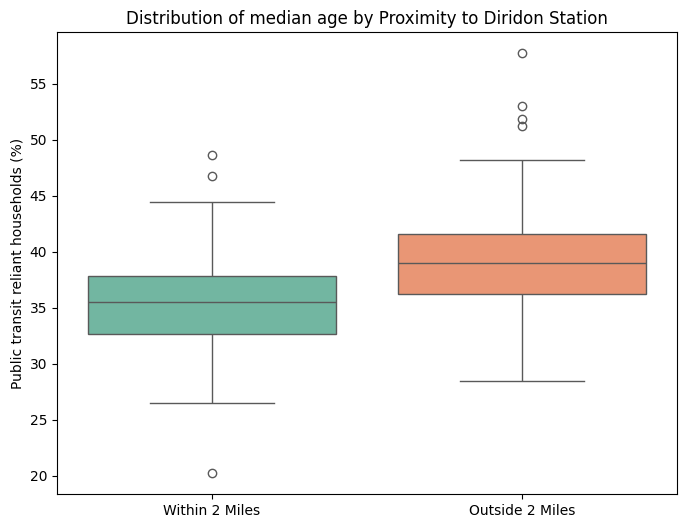

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'within_2mi_diridon' column exists as 0/1
# 1 = within 2 miles, 0 = outside
# Example: san_jose_tracts_with_acs['within_2mi_diridon'] already exists

# Map to labels for readability
san_jose_tracts_with_acs['Proximity'] = san_jose_tracts_with_acs['within_2mi_diridon'].map({0: "Outside 2 Miles", 1: "Within 2 Miles"})

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Proximity',
    y='median_age',
    data=san_jose_tracts_with_acs,
    palette="Set2"
)
plt.title("Distribution of median age by Proximity to Diridon Station")
plt.ylabel("Public transit reliant households (%)")
plt.xlabel("")
plt.show()



<positron-console-cell-373>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



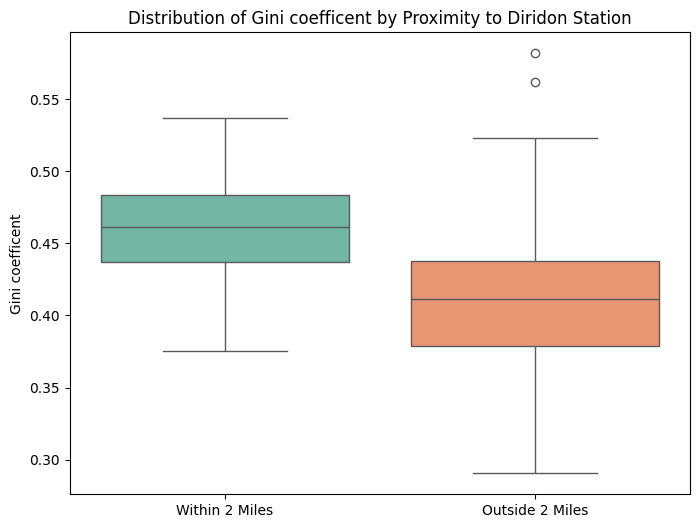

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'within_2mi_diridon' column exists as 0/1
# 1 = within 2 miles, 0 = outside
# Example: san_jose_tracts_with_acs['within_2mi_diridon'] already exists

# Map to labels for readability
san_jose_tracts_with_acs['Proximity'] = san_jose_tracts_with_acs['within_2mi_diridon'].map({0: "Outside 2 Miles", 1: "Within 2 Miles"})

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Proximity',
    y='gini',
    data=san_jose_tracts_with_acs,
    palette="Set2"
)
plt.title("Distribution of Gini coefficent by Proximity to Diridon Station")
plt.ylabel("Gini coefficent")
plt.xlabel("")
plt.show()



<positron-console-cell-346>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



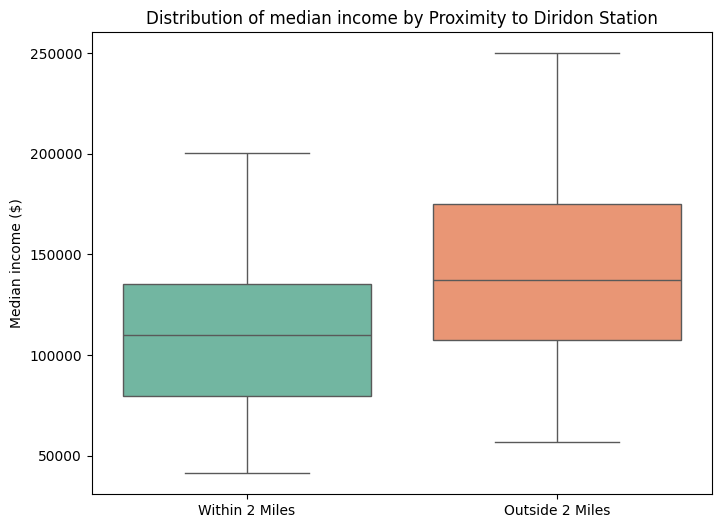

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'within_2mi_diridon' column exists as 0/1
# 1 = within 2 miles, 0 = outside
# Example: san_jose_tracts_with_acs['within_2mi_diridon'] already exists

# Map to labels for readability
san_jose_tracts_with_acs['Proximity'] = san_jose_tracts_with_acs['within_2mi_diridon'].map({0: "Outside 2 Miles", 1: "Within 2 Miles"})

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Proximity',
    y='median_income',
    data=san_jose_tracts_with_acs,
    palette="Set2"
)
plt.title("Distribution of median income by Proximity to Diridon Station")
plt.ylabel("Median income ($)")
plt.xlabel("")
plt.show()



<positron-console-cell-116>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



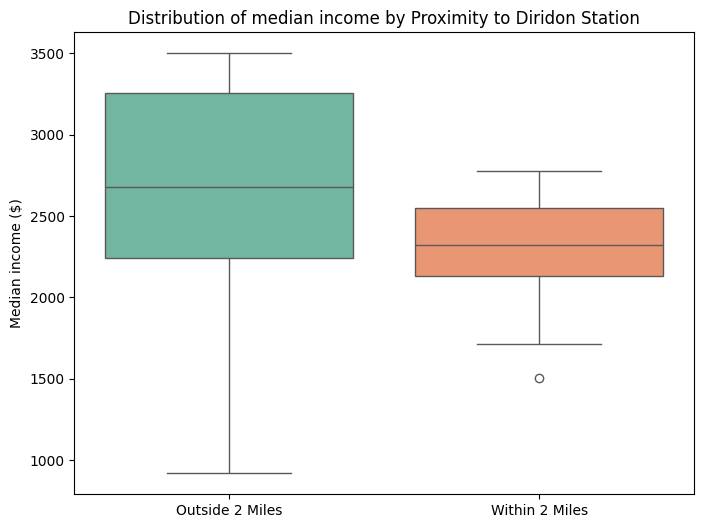

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'within_2mi_diridon' column exists as 0/1
# 1 = within 2 miles, 0 = outside
# Example: san_jose_tracts_with_acs['within_2mi_diridon'] already exists

# Map to labels for readability
san_jose_tracts_with_acs['Proximity'] = san_jose_tracts_with_acs['within_2mi_diridon'].map({0: "Outside 2 Miles", 1: "Within 2 Miles"})

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Proximity',
    y='median_rent',
    data=san_jose_tracts_with_acs,
    palette="Set2"
)
plt.title("Distribution of median income by Proximity to Diridon Station")
plt.ylabel("Median income ($)")
plt.xlabel("")
plt.show()



In [356]:
parcels

OBJECTID    PARCELID       INTID       APN LOTNUM PARCELTYPE FEATURECLA PLANCRT   PLANMOD LASTUPDATE NOTES COVERED   SHAPE_Leng     SHAPE_Area CREATIONDA  \
0              1         568         568  23712112      7        Tax     Parcel     MGE      None 2005-10-25  None    None   694.824660   30293.181866 1900-01-01   
1              2         508         508  23717101      1        Tax     Parcel     MGE      None 2005-10-25  None    None  1091.096404   67674.864533 1900-01-01   
2              3         509         509  23717102      2        Tax     Parcel     MGE      None 2005-10-25  None    None  1308.365727  101464.923357 1900-01-01   
3              4         510         510  23717099      A        Tax     Parcel     MGE      None 2005-10-25  None    None   928.437778   51153.749677 1900-01-01   
4              5       11908       11908  58705049     74        Tax     Parcel  T-3252      None 2005-10-25  None    None   339.402106    6568.968404 1900-01-01   
...          ...         ...         ...       ...    ...        ...        ...     ...       ...        ...   ...     ...          ...            ...        ...   
224903    415370  1000027361  1000027361  68965C10      B        Tax     Parcel  T-8952      None 2025-07-16  None      No   721.451091    8808.861391 2025-07-16   
224904    415371  1000027362  1000027362  68965C13      E        Tax     Parcel  T-8952      None 2025-07-16  None      No   595.221694    7043.157226 2025-07-16   
224905    415372  1000027360  1000027360  68965C11      C        Tax     Parcel  T-8952      None 2025-07-16  None      No  1205.601073   15315.400284 2025-07-16   
224906    415373  1000027366  1000027366  46255???   None        Tax     Parcel  T-5612  AT24-010 2025-07-23  None      No   659.028878   16929.485228 2025-07-23   
224907    415374  1000027367  1000027367      None   None        Tax     Parcel  T-2145      None 2025-08-01   PSE      No   339.372708    5131.902543 2025-07-30   

                                                 geometry  
0       POLYGON ((6152190.18 1960992.53, 6152117.6 196...  
1       POLYGON ((6149855.9 1962848.74, 6149591.14 196...  
2       POLYGON ((6150024.95 1962661.16, 6149801.39 19...  
3       POLYGON ((6149690.78 1962949.62, 6149484.72 19...  
4       POLYGON ((6169021.55 1973009.12, 6169053.1 197...  
...                                                   ...  
224903  POLYGON ((6181540.566 1912608.017, 6181548.945...  
224904  POLYGON ((6181714.667 1912479.913, 6181746.15 ...  
224905  POLYGON ((6182023.95 1912665.8, 6182023.916 19...  
224906  POLYGON ((6167596.59 1921709.25, 6167600.382 1...  
224907  POLYGON ((6162883.65 1903062.51, 6162920.7 190...  

[224908 rows x 16 columns]

#### 4.10 identifying types of parcels within 2 miles

In [ ]:
parcels_in_zd_unique[parcels_in_zd_unique["ZONING"].isin(["UV", "MUC", "UR", "TR"])]parcels_in_residential_zones.plot()

In [58]:
parcels_in_zd_unique.head()



OBJECTID_left    PARCELID  INTID_left       APN LOTNUM PARCELTYPE  \
0           4378        1000        1000  09759046     46        Tax   
1         173262  1000000031  1000000031  30326084      6        Tax   
2          69247  1000000032  1000000032  30326083      5        Tax   
3         147109  1000000033  1000000033  30326082      4        Tax   
4         147110  1000000034  1000000034  30326081      3        Tax   

  FEATURECLA PLANCRT PLANMOD LASTUPDATE_left NOTES_left COVERED  \
0     Parcel  T-8284    None      2005-10-25       None    None   
1     Parcel  TR9494    None      2006-01-12       None    None   
2     Parcel  TR9494    None      2006-01-12       None    None   
3     Parcel  TR9494    None      2006-01-12       None    None   
4     Parcel  TR9494    None      2006-01-12       None    None   

   SHAPE_Leng_left  SHAPE_Area_left CREATIONDA  \
0       149.517344      1163.273287 1900-01-01   
1       188.703136      2037.538177 1900-01-01   
2       187.780061      2020.818784 1900-01-01   
3       187.209294      1994.378436 1900-01-01   
4       212.838294      2261.152730 1900-01-01   

                                            geometry  OBJECTID_right  \
0  POLYGON ((6148775 1972503.67, 6148789.84 19724...          1396.0   
1  POLYGON ((6135031.65 1943098.55, 6135092.737 1...           288.0   
2  POLYGON ((6135031.425 1943065.085, 6135092.096...           288.0   
3  POLYGON ((6135129.912 1943077.395, 6135136.921...           288.0   
4  POLYGON ((6135219.701 1943048.88, 6135219.367 ...           288.0   

  FACILITYID  INTID_right ZONING ZONINGABBR REZONINGFI PDUSE PDDENSITY  \
0       1396       1396.0  A(PD)      A(PD)      88034   Res      25.6   
1        288        288.0  A(PD)      A(PD)      02028   Res        13   
2        288        288.0  A(PD)      A(PD)      02028   Res        13   
3        288        288.0  A(PD)      A(PD)      02028   Res        13   
4        288        288.0  A(PD)      A(PD)      02028   Res        13   

  DEVELOPEDA APPROVALDA COLORCODE LASTUPDATE_right NOTES_right  \
0        Yes       None        17       2022-04-22        None   
1        Yes       None        17       2022-04-22        None   
2        Yes       None        17       2022-04-22        None   
3        Yes       None        17       2022-04-22        None   
4        Yes       None        17       2022-04-22        None   

   SHAPE_Leng_right  SHAPE_Area_right  overlap_area  
0       5039.839521      1.155021e+06   1163.273287  
1        737.405158      2.014218e+04   2037.538177  
2        737.405158      2.014218e+04   2020.818784  
3        737.405158      2.014218e+04   1994.378436  
4        737.405158      2.014218e+04   2261.152730

In [67]:
parcels_in_zd_unique["NOTES_right"].unique()

array([None, 'AUG29', 'ORD30922',
       'No correct zoning file, ORDINANCE NO. 30611 C20-002 references another area, https://www.sanjoseca.gov/home/showpublisheddocument/71431',
       nan, 'ORD30888', 'ORD30782',
       'SB1333 Rezoning_DT_DSAP_Growth Area 5',
       'Split on 6/4/2024 from adjacent feature due to SB 1333 rezoning, as the rezoning only included APN 56902071',
       'TERO', 'ORD30783', 'HE91_FinalRezoning',
       'updated to encompass gap near berryessa, PDC16-001, PD09-006',
       'ticket 130128', 'Incorrectly added to  Rezoning AUG29',
       'Incorrectly added to Rezoning AUG29',
       'AMANDA does not have Approved Status', 'CP18-029',
       'boundary updated 1/30/24 for overlapping Mckean Rd',
       'Was rezoned to CP as part of C22-056 incorrectly - should be R1',
       'Reviewed zoning ordinance and staff report for maps; should not overlap with DC(PD)',
       'Sep20',
       'Burbank 44 Annexation, prezoning scheduled on March 28th 2023',
       '3081

<Axes: >

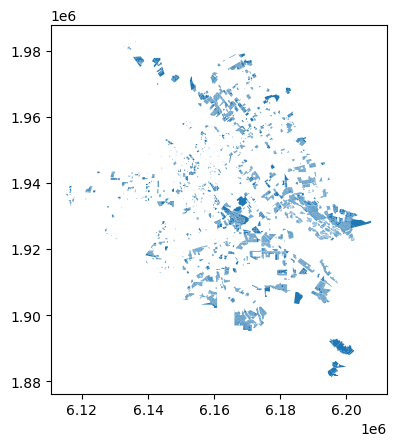

In [63]:
#parcels_in_zd_unique["PDUSE"].unique()

res_use = ["Res", "Res/Com Mixed", "Res/Mixed Use", "Residential", "RES"]

#  subset just the 4 zones
parcels_resonly = parcels_in_zd_unique[parcels_in_zd_unique["PDUSE"].isin(res_use)]

parcels_resonly.plot()


<Axes: >

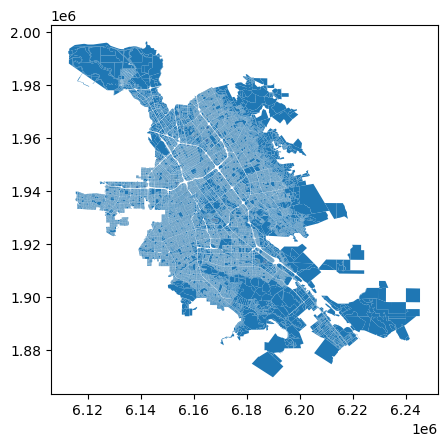

In [57]:
parcels.plot()

<Axes: >

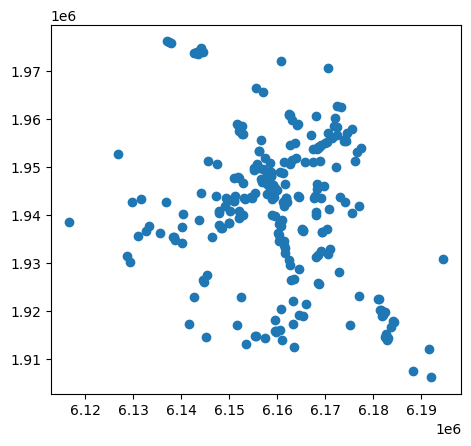

In [68]:
affordable_housing.plot()

In [387]:
parcels_in_zd["ZONING"].unique()

array(['HI', 'A(PD)', 'CG', 'IP(PD)', 'IP', 'R-1-8', 'R-1-5(PD)', 'LI', 'HI(PD)', 'LI(PD)', 'PQP', 'R-1-8(PD)', 'R-1-2', 'MUN', 'R-M(PD)', 'OS', 'A', 'CO', 'CP(PD)', 'R-M', 'R-2', 'CIC(PD)', nan, 'CIC', 'R-1-5', 'CP', 'UR', 'CN', 'R-1-1',
       'TEC', 'R-MH', 'R-M(CL)', 'CG(PD)', 'R-2(PD)', 'MS-G', 'MS-C', 'UV', 'CO(PD)', 'DC', 'MUC', 'CN(PD)', 'TEC(PD)', 'TR', 'WATER', 'DC(PD)', 'DC-NT1', 'R-1-RR', 'OS(PD)', 'UVC', None, 'PQP(PD)', 'R-1-2(PD)', 'UR(PD)', 'R-1-8(CL)',
       'R-1-1(PD)', 'R-1-5(CL)', 'MUN(PD)'], dtype=object)

<Axes: >

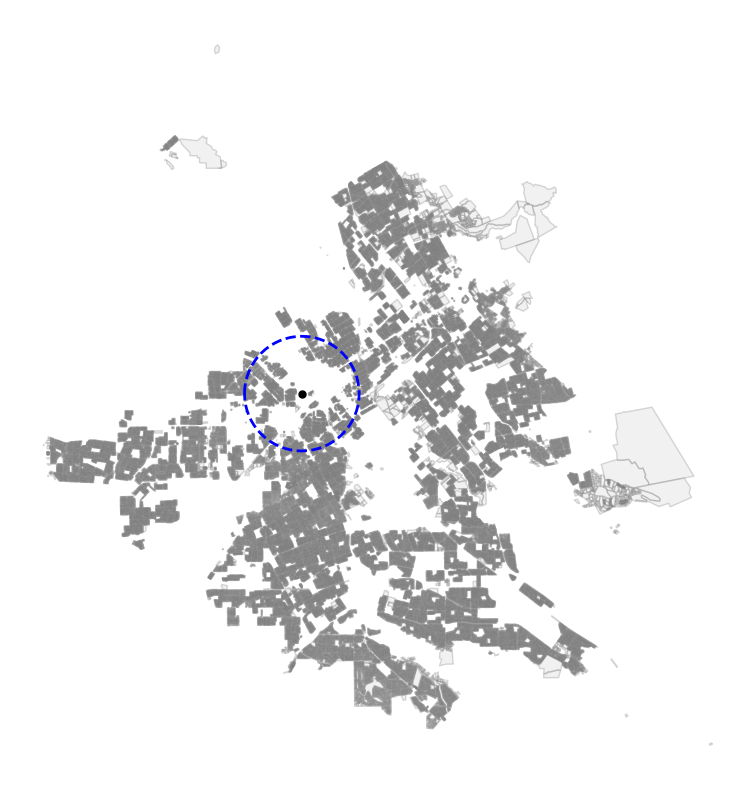

In [55]:
residential = parcels_in_zd_unique[parcels_in_zd_unique["ZONING"].isin(["R-1-8", "R-1-5(PD)", "R-1-8(PD)", "R-1-2", "R-M(PD)", "R-M", "R-2", "R-1-5", "R-1-1", "R-2(PD)", "R-1-RR", "R-1-2(PD)", "R-1-8(CL)", "R-1-1(PD)","R-1-5(CL)"])]

# reproject to ensure in same
residential = residential.to_crs(epsg=4269)
diridon_station = diridon_station.to_crs(epsg=4269)
buffer_2mile = buffer_2mile.to_crs(epsg=4269)

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")

# Plot residential parcels
residential.plot(ax=ax, color="lightgrey", edgecolor="grey", alpha = 0.3)

# Add station marker
diridon_station.plot(
    ax=ax, color="black", marker=".", markersize=100, label="Diridon Station"
)

# Add buffer outline
buffer_2mile.boundary.plot(
    ax=ax, color="blue", linestyle="--", linewidth=2, label="2-mile radius"
)


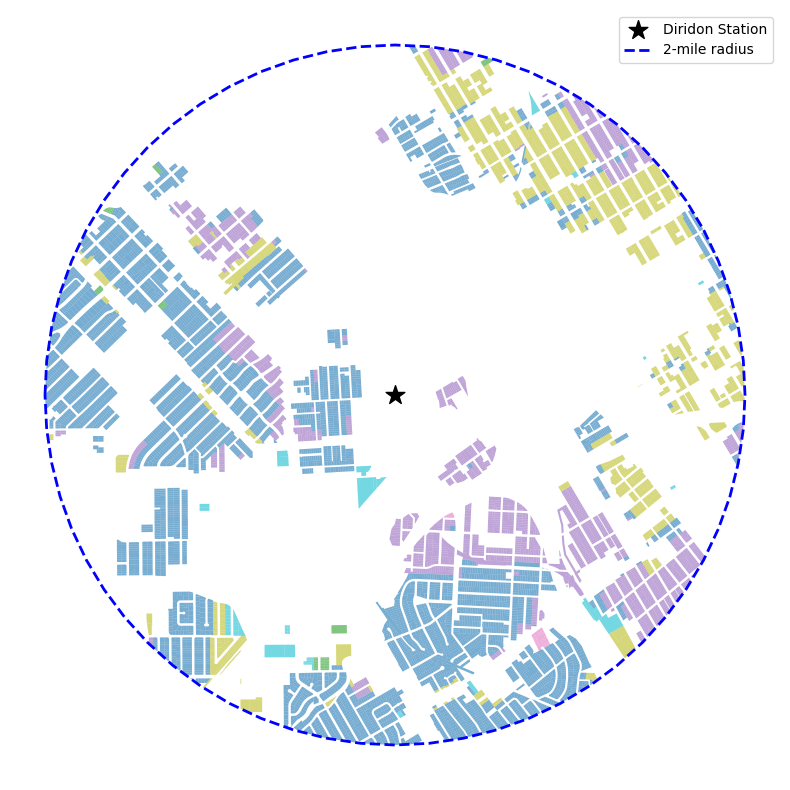

In [398]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Make sure everything is in the same CRS
residential = residential.to_crs(epsg=4269)
diridon_station = diridon_station.to_crs(epsg=4269)
buffer_2mile = buffer_2mile.to_crs(epsg=4269)

# Clip residential parcels to 2-mile buffer
residential_within_buffer = gpd.clip(residential, buffer_2mile)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")

# Parcels inside buffer
residential_within_buffer.plot(ax=ax, column="ZONING", legend=True, alpha=0.6)

# Station
diridon_station.plot(
    ax=ax, color="black", marker="*", markersize=200, label="Diridon Station"
)

# Buffer outline
buffer_2mile.boundary.plot(
    ax=ax, color="blue", linestyle="--", linewidth=2, label="2-mile radius"
)

ax.legend()
plt.show()


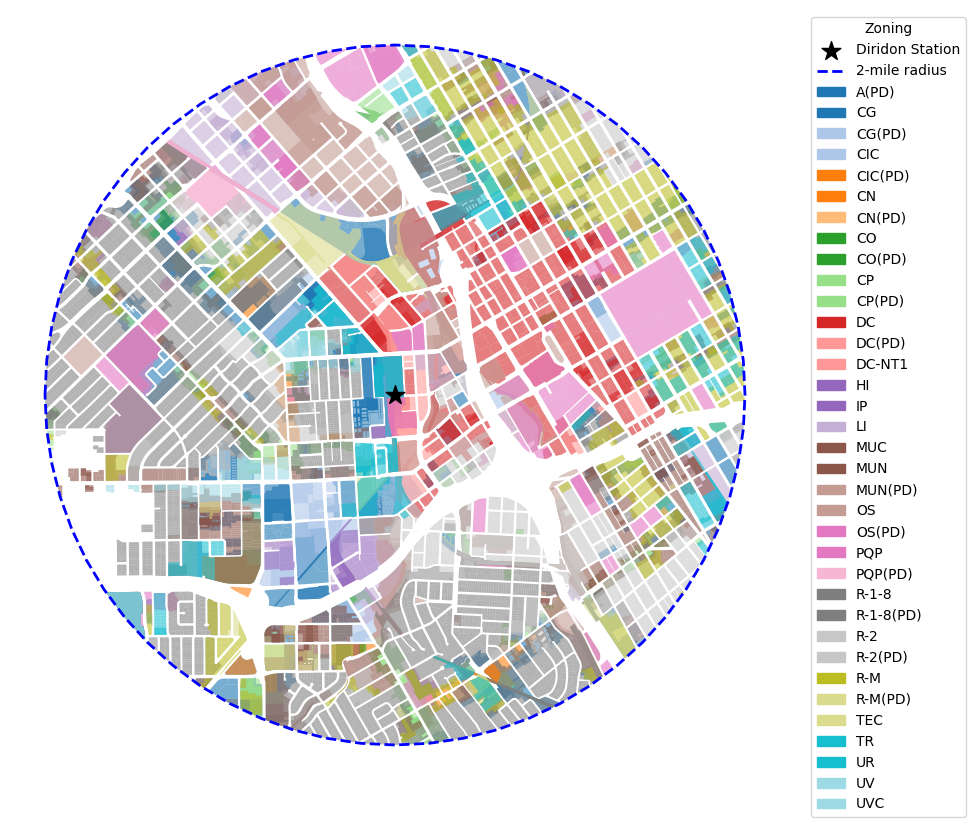

In [410]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Make sure everything is in the same CRS
parcels_in_zd = parcels_in_zd.to_crs(epsg=4269)
diridon_station = diridon_station.to_crs(epsg=4269)
buffer_2mile = buffer_2mile.to_crs(epsg=4269)

# Clip all parcels to the 2-mile buffer
parcels_within_buffer = gpd.clip(parcels_in_zd, buffer_2mile)

# Ensure zoning is categorical
parcels_within_buffer["ZONING"] = parcels_within_buffer["ZONING"].astype("category")

# Build color map for unique zoning types
unique_zones = parcels_within_buffer["ZONING"].cat.categories
cmap = plt.get_cmap("tab20", len(unique_zones))  # qualitative color set
zone_colors = {zone: cmap(i) for i, zone in enumerate(unique_zones)}

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")

# Plot parcels with zoning categories
for zone, color in zone_colors.items():
    parcels_within_buffer[parcels_within_buffer["ZONING"] == zone].plot(
        ax=ax, color=color,  alpha=0.6
    )

# Plot station + buffer
diridon_station.plot(ax=ax, color="black", marker="*", markersize=200, label="Diridon Station")
buffer_2mile.boundary.plot(ax=ax, color="blue", linestyle="--", linewidth=2, label="2-mile radius")

# Build manual legend for zoning
zone_patches = [mpatches.Patch(color=color, label=zone) for zone, color in zone_colors.items()]

# Combine with station + buffer legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles + zone_patches, labels + [p.get_label() for p in zone_patches],
    title="Zoning", loc="upper right", bbox_to_anchor=(1.25, 1)
)

plt.show()


## SECTION B 

**PROMPT:** This open-ended section provides an opportunity to showcase data skills relevant to the role. This is meant to be relatively brief - a paragraph or two describing the project and then around 40 lines1 of code in Python. For a non-exhaustive list of possibilities: Is there a tricky section of a data pipeline that highlights your meticulous nature? Did you develop a useful predictive model? Do you have a data visualization that you think is impactful? Do you have a particularly thoughtful way of doing exploratory data analysis that you want to show off? Sharing code via GitHub is preferred but not required.

**WHAT I DID:**

#### Model

In [ ]:
san_jose_tracts_with_acs.shape

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

model = smf.logit("within_2mi_diridon ~ pct_renters + vacancy_rate + bike_pct + median_rent + median_income + median_age + below_poverty + pct_white + pct_black + pct_latino + pct_college_plus", data=san_jose_tracts_with_acs).fit()
print(model.summary())


In [ ]:
# Get coefficients
params = model.params

# Convert to odds ratios
odds_ratios = np.exp(params)

# Also get confidence intervals
conf = model.conf_int()
conf["OR_lower"] = np.exp(conf[0])
conf["OR_upper"] = np.exp(conf[1])

# Combine into one tidy table
or_table = pd.DataFrame({
    "OR": odds_ratios,
    "CI_lower": conf["OR_lower"],
    "CI_upper": conf["OR_upper"]
})

print(or_table)